# Health Insurance Claim Prediction - Comprehensive ML Project

## Problem Statement
Predict health insurance claim amounts based on various demographic, health, and lifestyle factors. This project demonstrates comprehensive machine learning techniques including regression, classification, clustering, dimensionality reduction, and neural networks.

## Dataset
- **Source**: healthinsurance.csv
- **Target Variable**: claim (insurance claim amount)
- **Features**: age, sex, weight, BMI, hereditary_diseases, no_of_dependents, smoker, city, bloodpressure, diabetes, regular_ex, job_title


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("Libraries imported successfully!")


Libraries imported successfully!


# UNIT I: Introduction and Data Preparation
## Data Loading and Initial Exploration


In [2]:
# Load the dataset
df = pd.read_csv('healthinsurance.csv')

# Basic information about the dataset
print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"\nDataset Shape: {df.shape}")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

print("\n" + "="*60)
print("COLUMN NAMES AND DATA TYPES")
print("="*60)
print(df.dtypes)

print("\n" + "="*60)
print("FIRST FEW ROWS")
print("="*60)
df.head(10)


DATASET OVERVIEW

Dataset Shape: (15000, 13)
Number of Rows: 15000
Number of Columns: 13

COLUMN NAMES AND DATA TYPES
age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
no_of_dependents         int64
smoker                   int64
city                    object
bloodpressure            int64
diabetes                 int64
regular_ex               int64
job_title               object
claim                  float64
dtype: object

FIRST FEW ROWS


,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7
5,42.0,female,89,37.9,NoDisease,0,0,AtlanticCity,78,0,0,Dancer,6474.0
6,18.0,male,59,23.8,NoDisease,0,0,Portland,64,0,0,Singer,1705.6
7,21.0,male,52,26.8,NoDisease,0,0,Cambridge,74,1,0,Actor,1534.3
8,63.0,male,55,NaN,NoDisease,0,0,Hartford,70,1,0,Dancer,13390.6
9,40.0,female,69,29.6,NoDisease,0,0,Springfield,64,1,1,DataScientist,5910.9


In [3]:
# Check for missing values
print("="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0]
if len(missing_df) > 0:
    print(missing_df)
else:
    print("No missing values found!")

# Check for duplicates
print(f"\nDuplicate Rows: {df.duplicated().sum()}")

# Basic statistics
print("\n" + "="*60)
print("STATISTICAL SUMMARY")
print("="*60)
df.describe()


MISSING VALUES ANALYSIS
     Missing Count  Percentage
age            396    2.640000
bmi            956    6.373333

Duplicate Rows: 1096

STATISTICAL SUMMARY


,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
count,14604.000000,15000.000000,14044.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,64.909600,30.266413,1.129733,0.198133,68.650133,0.777000,0.224133,13401.437620
std,14.015966,13.701935,6.122950,1.228469,0.398606,19.418515,0.416272,0.417024,12148.239619
min,18.000000,34.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.900000
25%,27.000000,54.000000,25.700000,0.000000,0.000000,64.000000,1.000000,0.000000,4846.900000
50%,40.000000,63.000000,29.400000,1.000000,0.000000,71.000000,1.000000,0.000000,9545.650000
75%,52.000000,76.000000,34.400000,2.000000,0.000000,80.000000,1.000000,0.000000,16519.125000
max,64.000000,95.000000,53.100000,5.000000,1.000000,122.000000,1.000000,1.000000,63770.400000


In [4]:
# Check unique values in categorical columns
print("="*60)
print("CATEGORICAL VARIABLES ANALYSIS")
print("="*60)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Value counts:\n{df[col].value_counts().head(10)}")


CATEGORICAL VARIABLES ANALYSIS

sex:
  Unique values: 2
  Value counts:
sex
female    7652
male      7348
Name: count, dtype: int64

hereditary_diseases:
  Unique values: 10
  Value counts:
hereditary_diseases
NoDisease       13998
Diabetes          148
Alzheimer         144
Obesity           136
EyeDisease        123
Cancer            109
Arthritis          96
HeartDisease       93
Epilepsy           84
High BP            69
Name: count, dtype: int64

city:
  Unique values: 91
  Value counts:
city
NewOrleans    302
Nashville     302
Charleston    298
Brimingham    298
Memphis       297
Louisville    293
Charlotte     293
Stamford      280
Newport       280
Harrisburg    280
Name: count, dtype: int64

job_title:
  Unique values: 35
  Value counts:
job_title
Student         1320
HomeMakers       972
Singer           744
Actor            720
FilmMaker        714
Dancer           693
HouseKeeper      667
Manager          602
Police           412
Photographer     400
Name: count, dtype: in

## Data Preprocessing and Cleaning


In [5]:
# Create a copy for preprocessing
df_clean = df.copy()

# Handle missing values in BMI column
print("Handling missing values in BMI column...")
missing_bmi = df_clean['bmi'].isnull().sum()
print(f"Missing BMI values: {missing_bmi}")

# Fill missing BMI with median (more robust to outliers)
df_clean['bmi'].fillna(df_clean['bmi'].median(), inplace=True)

# Handle missing values in bloodpressure
print(f"\nMissing bloodpressure values: {df_clean['bloodpressure'].isnull().sum()}")
df_clean['bloodpressure'].fillna(df_clean['bloodpressure'].median(), inplace=True)

# Verify no missing values remain
print(f"\nRemaining missing values: {df_clean.isnull().sum().sum()}")

# Remove duplicates if any
initial_rows = len(df_clean)
df_clean = df_clean.drop_duplicates()
final_rows = len(df_clean)
print(f"\nRows before removing duplicates: {initial_rows}")
print(f"Rows after removing duplicates: {final_rows}")
print(f"Duplicates removed: {initial_rows - final_rows}")


Handling missing values in BMI column...
Missing BMI values: 956

Missing bloodpressure values: 0

Remaining missing values: 396

Rows before removing duplicates: 15000
Rows after removing duplicates: 13904
Duplicates removed: 1096


In [6]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Create label encoders for categorical variables
label_encoders = {}
categorical_features = ['sex', 'hereditary_diseases', 'city', 'job_title']

for col in categorical_features:
    le = LabelEncoder()
    df_clean[col + '_encoded'] = le.fit_transform(df_clean[col])
    label_encoders[col] = le
    print(f"{col}: {len(le.classes_)} unique values encoded")

# Display encoded columns
print("\nEncoded columns created successfully!")
df_clean[['sex', 'sex_encoded', 'hereditary_diseases', 'hereditary_diseases_encoded']].head()


sex: 2 unique values encoded
hereditary_diseases: 10 unique values encoded
city: 91 unique values encoded
job_title: 35 unique values encoded

Encoded columns created successfully!


,sex,sex_encoded,hereditary_diseases,hereditary_diseases_encoded
0,male,1,NoDisease,8
1,female,0,NoDisease,8
2,female,0,Epilepsy,4
3,female,0,NoDisease,8
4,female,0,NoDisease,8


## Data Visualization


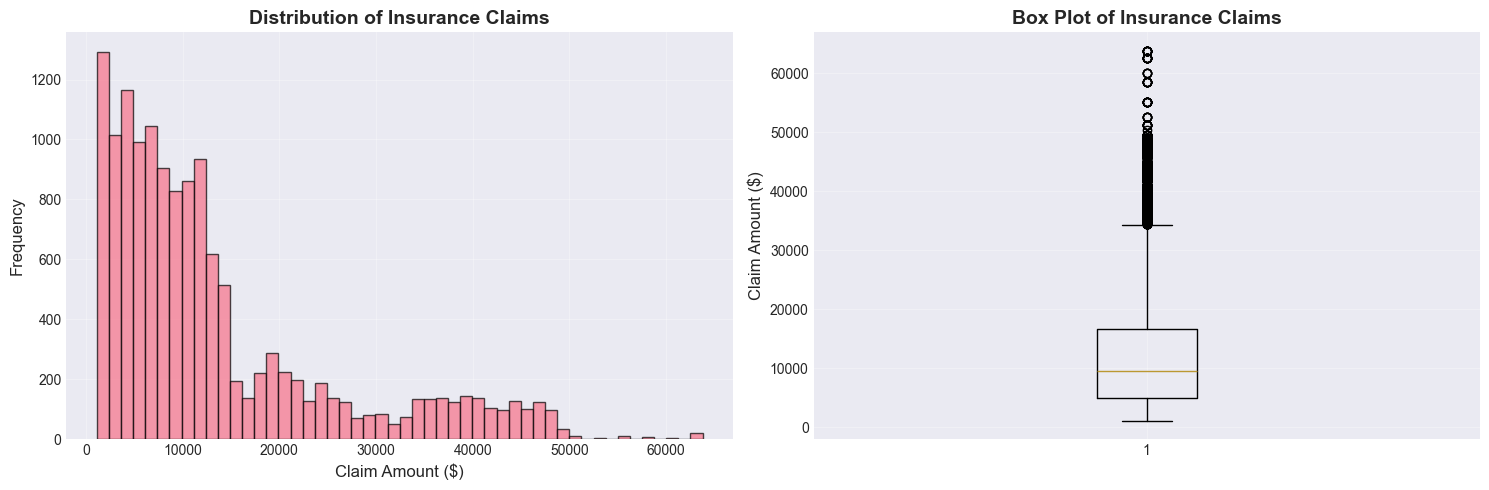

Claim Statistics:
Mean: $13431.81
Median: $9567.00
Std Dev: $12142.10
Min: $1121.90
Max: $63770.40


In [7]:
# Distribution of target variable (claim)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df_clean['claim'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Insurance Claims', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Claim Amount ($)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(df_clean['claim'], vert=True)
axes[1].set_title('Box Plot of Insurance Claims', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Claim Amount ($)', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Claim Statistics:")
print(f"Mean: ${df_clean['claim'].mean():.2f}")
print(f"Median: ${df_clean['claim'].median():.2f}")
print(f"Std Dev: ${df_clean['claim'].std():.2f}")
print(f"Min: ${df_clean['claim'].min():.2f}")
print(f"Max: ${df_clean['claim'].max():.2f}")


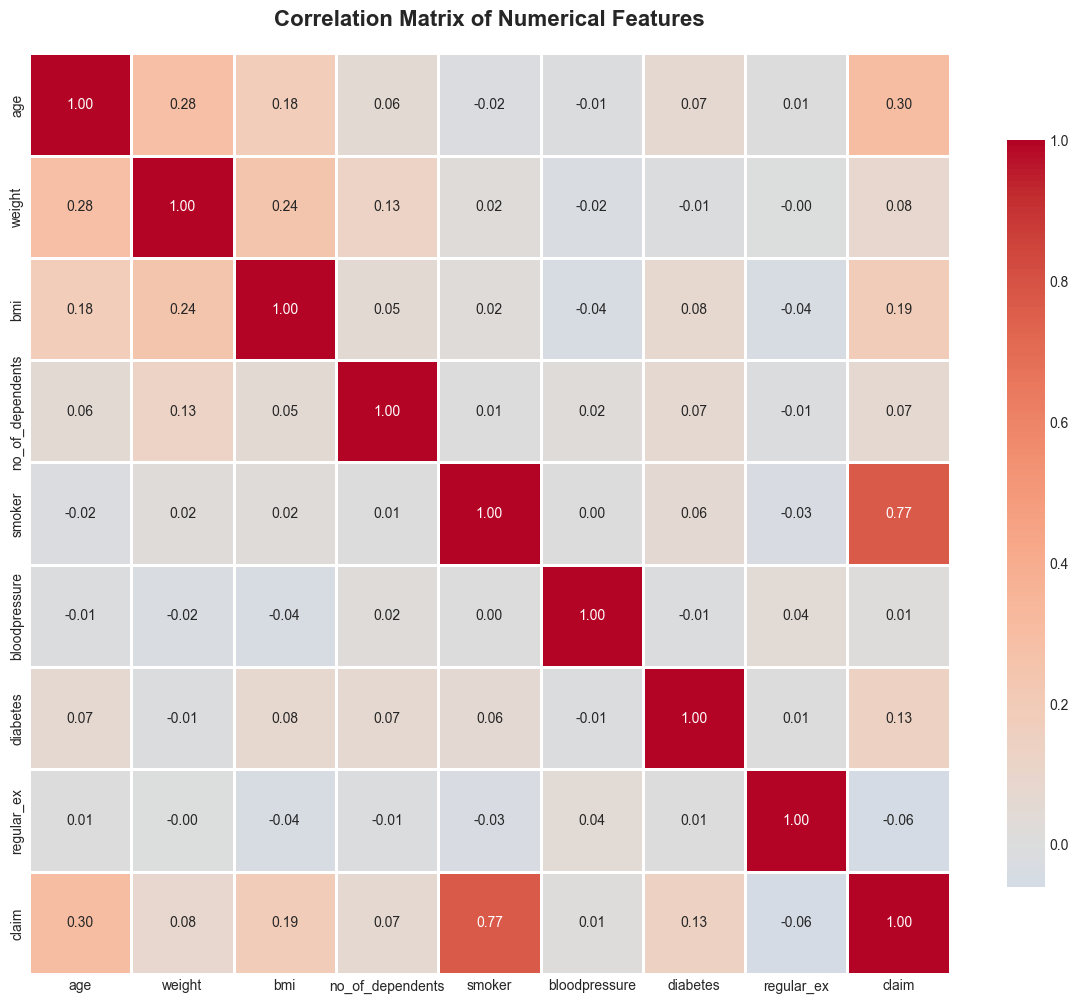

In [8]:
# Correlation matrix
numeric_cols = ['age', 'weight', 'bmi', 'no_of_dependents', 'smoker', 
                'bloodpressure', 'diabetes', 'regular_ex', 'claim']
correlation_matrix = df_clean[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


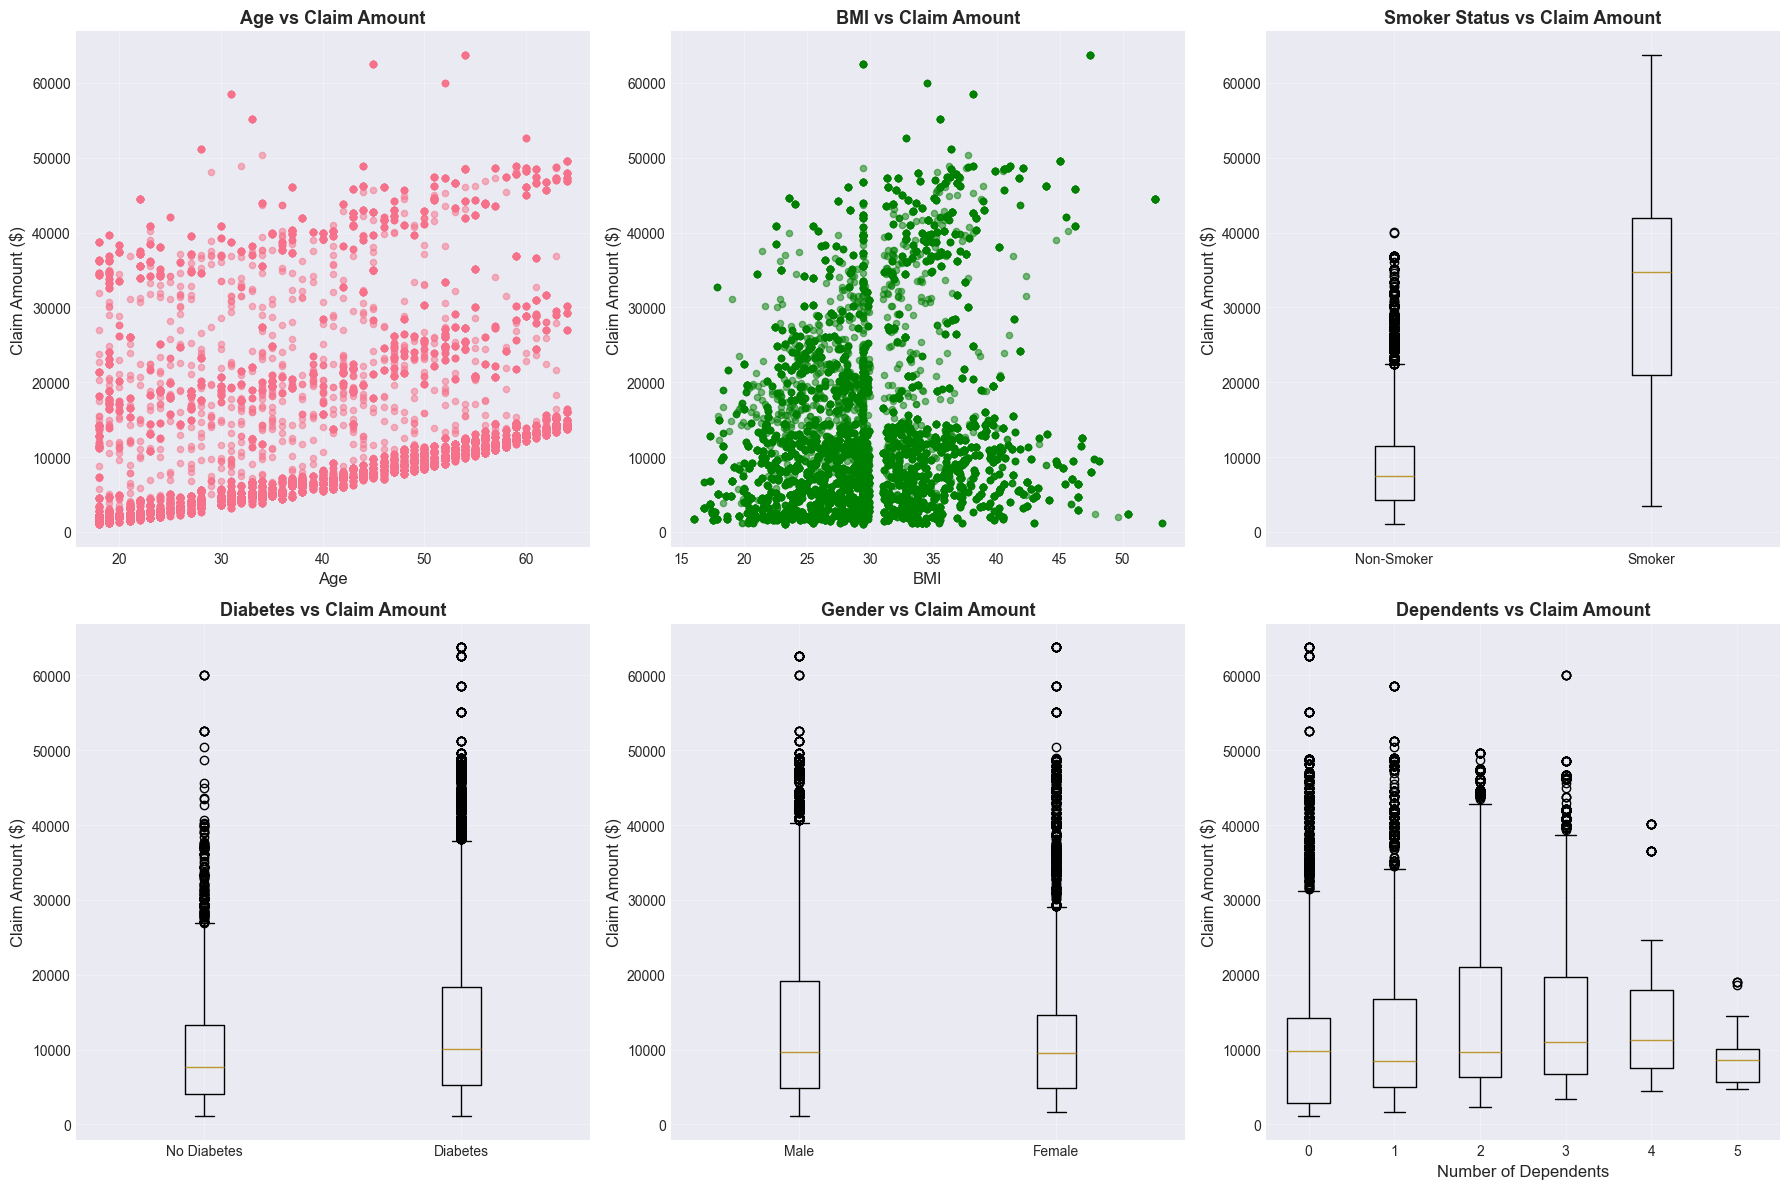

In [9]:
# Visualize relationships between key features and claim
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Age vs Claim
axes[0, 0].scatter(df_clean['age'], df_clean['claim'], alpha=0.5, s=20)
axes[0, 0].set_xlabel('Age', fontsize=12)
axes[0, 0].set_ylabel('Claim Amount ($)', fontsize=12)
axes[0, 0].set_title('Age vs Claim Amount', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# BMI vs Claim
axes[0, 1].scatter(df_clean['bmi'], df_clean['claim'], alpha=0.5, s=20, color='green')
axes[0, 1].set_xlabel('BMI', fontsize=12)
axes[0, 1].set_ylabel('Claim Amount ($)', fontsize=12)
axes[0, 1].set_title('BMI vs Claim Amount', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Smoker vs Claim
smoker_claims = [df_clean[df_clean['smoker']==0]['claim'], 
                 df_clean[df_clean['smoker']==1]['claim']]
axes[0, 2].boxplot(smoker_claims, labels=['Non-Smoker', 'Smoker'])
axes[0, 2].set_ylabel('Claim Amount ($)', fontsize=12)
axes[0, 2].set_title('Smoker Status vs Claim Amount', fontsize=13, fontweight='bold')
axes[0, 2].grid(True, alpha=0.3)

# Diabetes vs Claim
diabetes_claims = [df_clean[df_clean['diabetes']==0]['claim'], 
                   df_clean[df_clean['diabetes']==1]['claim']]
axes[1, 0].boxplot(diabetes_claims, labels=['No Diabetes', 'Diabetes'])
axes[1, 0].set_ylabel('Claim Amount ($)', fontsize=12)
axes[1, 0].set_title('Diabetes vs Claim Amount', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Sex vs Claim
sex_claims = [df_clean[df_clean['sex']=='male']['claim'], 
              df_clean[df_clean['sex']=='female']['claim']]
axes[1, 1].boxplot(sex_claims, labels=['Male', 'Female'])
axes[1, 1].set_ylabel('Claim Amount ($)', fontsize=12)
axes[1, 1].set_title('Gender vs Claim Amount', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

# Number of Dependents vs Claim
dependents_claims = [df_clean[df_clean['no_of_dependents']==i]['claim'] 
                     for i in sorted(df_clean['no_of_dependents'].unique())]
axes[1, 2].boxplot(dependents_claims, labels=sorted(df_clean['no_of_dependents'].unique()))
axes[1, 2].set_xlabel('Number of Dependents', fontsize=12)
axes[1, 2].set_ylabel('Claim Amount ($)', fontsize=12)
axes[1, 2].set_title('Dependents vs Claim Amount', fontsize=13, fontweight='bold')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Exploratory Data Analysis (EDA) and Statistical Analysis


In [10]:
# Statistical analysis by groups
print("="*60)
print("STATISTICAL ANALYSIS BY SMOKER STATUS")
print("="*60)
smoker_stats = df_clean.groupby('smoker')['claim'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
smoker_stats.columns = ['Count', 'Mean', 'Median', 'Std Dev', 'Min', 'Max']
print(smoker_stats)

print("\n" + "="*60)
print("STATISTICAL ANALYSIS BY DIABETES STATUS")
print("="*60)
diabetes_stats = df_clean.groupby('diabetes')['claim'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
diabetes_stats.columns = ['Count', 'Mean', 'Median', 'Std Dev', 'Min', 'Max']
print(diabetes_stats)

print("\n" + "="*60)
print("STATISTICAL ANALYSIS BY GENDER")
print("="*60)
gender_stats = df_clean.groupby('sex')['claim'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
gender_stats.columns = ['Count', 'Mean', 'Median', 'Std Dev', 'Min', 'Max']
print(gender_stats)


STATISTICAL ANALYSIS BY SMOKER STATUS
        Count          Mean   Median       Std Dev     Min      Max
smoker                                                             
0       11114   8745.036513   7512.3   6237.701515  1121.9  40114.8
1        2790  32101.649642  34779.6  11986.510337  3480.8  63770.4

STATISTICAL ANALYSIS BY DIABETES STATUS
          Count          Mean   Median       Std Dev     Min      Max
diabetes                                                             
0          3182  10426.802577   7742.1   8795.154784  1131.5  60021.4
1         10722  14323.619894  10118.4  12835.919023  1121.9  63770.4

STATISTICAL ANALYSIS BY GENDER
        Count          Mean  Median       Std Dev     Min      Max
sex                                                               
female   7091  12748.322000  9541.7  11322.934398  1607.5  63770.4
male     6813  14143.194921  9617.7  12902.169164  1121.9  62592.9


In [11]:
# Prepare features for modeling
# Select features for regression
feature_cols = ['age', 'weight', 'bmi', 'no_of_dependents', 'smoker', 
                'bloodpressure', 'diabetes', 'regular_ex',
                'sex_encoded', 'hereditary_diseases_encoded', 
                'city_encoded', 'job_title_encoded']

X = df_clean[feature_cols]
y = df_clean['claim']

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"\nFeatures used: {feature_cols}")


Feature matrix shape: (13904, 12)
Target vector shape: (13904,)

Features used: ['age', 'weight', 'bmi', 'no_of_dependents', 'smoker', 'bloodpressure', 'diabetes', 'regular_ex', 'sex_encoded', 'hereditary_diseases_encoded', 'city_encoded', 'job_title_encoded']


# UNIT II: SUPERVISED LEARNING - REGRESSION

## Simple Linear Regression


SIMPLE LINEAR REGRESSION RESULTS (Age vs Claim)
Mean Absolute Error (MAE): $9174.68
Mean Squared Error (MSE): $134767299.64
Root Mean Squared Error (RMSE): $11608.93
R-squared (R²) Score: 0.0838

Coefficient (slope): 263.16
Intercept: $3146.33


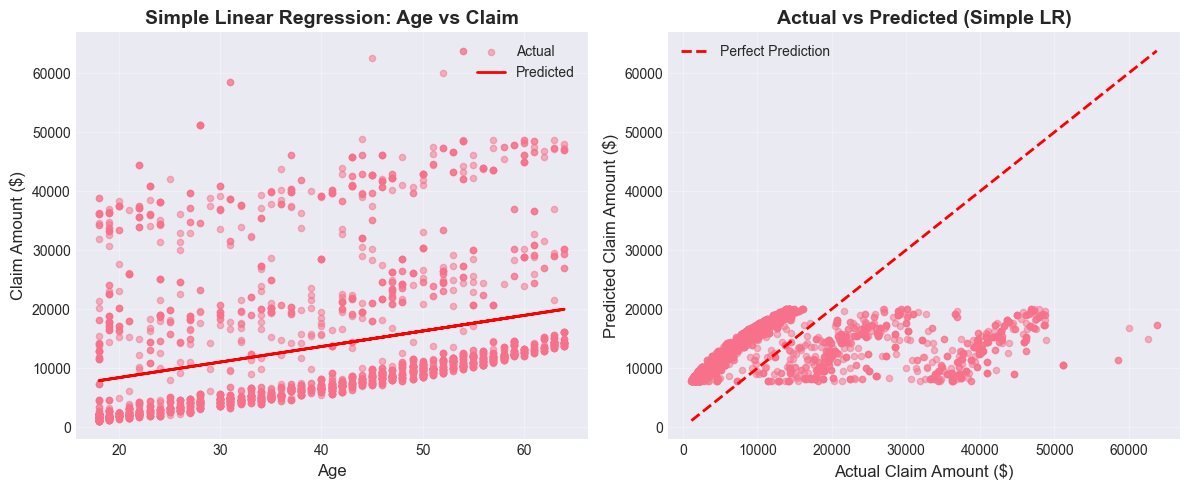

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

# Ensure df_clean exists and has no NaN values
# If df_clean doesn't exist, create it from df
if 'df_clean' not in globals():
    df_clean = df.copy()
    # Handle missing values
    df_clean['bmi'].fillna(df_clean['bmi'].median(), inplace=True)
    df_clean['bloodpressure'].fillna(df_clean['bloodpressure'].median(), inplace=True)
    df_clean = df_clean.drop_duplicates()

# For simple linear regression, drop rows with NaN in age or claim
df_simple = df_clean[['age', 'claim']].dropna()

# Split data for simple linear regression (using age as feature)
X_simple = df_simple[['age']].values
y_simple = df_simple['claim'].values

# Verify no NaN values
assert not np.isnan(X_simple).any(), "X_simple contains NaN values"
assert not np.isnan(y_simple).any(), "y_simple contains NaN values"

X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42
)

# Train Simple Linear Regression
simple_lr = LinearRegression()
simple_lr.fit(X_train_simple, y_train_simple)

# Predictions
y_pred_simple = simple_lr.predict(X_test_simple)

# Evaluate Model Performance
mae_simple = mean_absolute_error(y_test_simple, y_pred_simple)
mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
rmse_simple = math.sqrt(mse_simple)
r2_simple = r2_score(y_test_simple, y_pred_simple)

print("="*60)
print("SIMPLE LINEAR REGRESSION RESULTS (Age vs Claim)")
print("="*60)
print(f"Mean Absolute Error (MAE): ${mae_simple:.2f}")
print(f"Mean Squared Error (MSE): ${mse_simple:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_simple:.2f}")
print(f"R-squared (R²) Score: {r2_simple:.4f}")
print(f"\nCoefficient (slope): {simple_lr.coef_[0]:.2f}")
print(f"Intercept: ${simple_lr.intercept_:.2f}")

# Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_test_simple, y_test_simple, alpha=0.5, label='Actual', s=20)
plt.plot(X_test_simple, y_pred_simple, color='red', linewidth=2, label='Predicted')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Claim Amount ($)', fontsize=12)
plt.title('Simple Linear Regression: Age vs Claim', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y_test_simple, y_pred_simple, alpha=0.5, s=20)
plt.plot([y_test_simple.min(), y_test_simple.max()], 
         [y_test_simple.min(), y_test_simple.max()], 
         'r--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Claim Amount ($)', fontsize=12)
plt.ylabel('Predicted Claim Amount ($)', fontsize=12)
plt.title('Actual vs Predicted (Simple LR)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Multiple Linear Regression


MULTIPLE LINEAR REGRESSION RESULTS
Mean Absolute Error (MAE): $4110.30
Mean Squared Error (MSE): $37356209.11
Root Mean Squared Error (RMSE): $6111.97
R-squared (R²) Score: 0.7460

FEATURE IMPORTANCE (Coefficients)
                        Feature   Coefficient
4                        smoker  21509.603209
9   hereditary_diseases_encoded  -1573.784612
6                      diabetes   1431.689913
7                    regular_ex   -929.481353
3              no_of_dependents    416.075483
8                   sex_encoded   -330.229854
0                           age    272.531231
2                           bmi    236.249129
1                        weight    -36.844415
11            job_title_encoded     31.336543
5                 bloodpressure      4.264385
10                 city_encoded     -1.286395


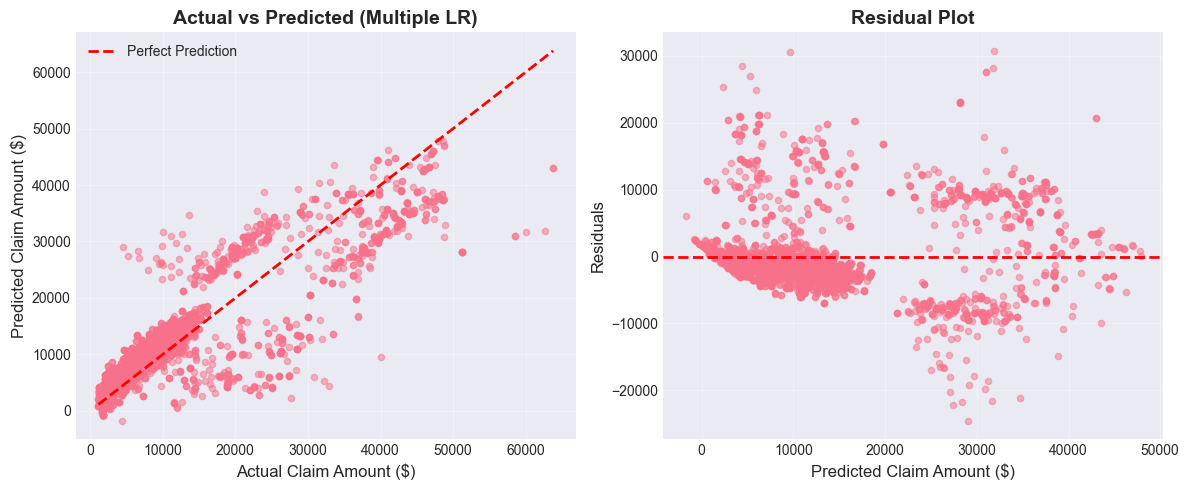

In [13]:
# Multiple Linear Regression with all features
# Ensure X and y have no NaN values
# Check if X and y exist, if not create them
if 'X' not in globals() or 'y' not in globals():
    # Ensure df_clean exists
    if 'df_clean' not in globals():
        df_clean = df.copy()
        df_clean['bmi'].fillna(df_clean['bmi'].median(), inplace=True)
        df_clean['bloodpressure'].fillna(df_clean['bloodpressure'].median(), inplace=True)
        df_clean = df_clean.drop_duplicates()
    
    # Encode categorical variables if not already done
    if 'sex_encoded' not in df_clean.columns:
        from sklearn.preprocessing import LabelEncoder
        label_encoders = {}
        categorical_features = ['sex', 'hereditary_diseases', 'city', 'job_title']
        for col in categorical_features:
            le = LabelEncoder()
            df_clean[col + '_encoded'] = le.fit_transform(df_clean[col].astype(str))
            label_encoders[col] = le
    
    # Prepare features
    feature_cols = ['age', 'weight', 'bmi', 'no_of_dependents', 'smoker', 
                    'bloodpressure', 'diabetes', 'regular_ex',
                    'sex_encoded', 'hereditary_diseases_encoded', 
                    'city_encoded', 'job_title_encoded']
    X = df_clean[feature_cols]
    y = df_clean['claim']

# Drop rows with any NaN values
mask = ~(X.isnull().any(axis=1) | y.isnull())
X = X[mask]
y = y[mask]

# Verify no NaN values
assert not X.isnull().any().any(), "X contains NaN values"
assert not y.isnull().any(), "y contains NaN values"

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Multiple Linear Regression
multiple_lr = LinearRegression()
multiple_lr.fit(X_train, y_train)

# Predictions
y_pred_multiple = multiple_lr.predict(X_test)

# Evaluate Model Performance
mae_multiple = mean_absolute_error(y_test, y_pred_multiple)
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
rmse_multiple = math.sqrt(mse_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print("="*60)
print("MULTIPLE LINEAR REGRESSION RESULTS")
print("="*60)
print(f"Mean Absolute Error (MAE): ${mae_multiple:.2f}")
print(f"Mean Squared Error (MSE): ${mse_multiple:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_multiple:.2f}")
print(f"R-squared (R²) Score: {r2_multiple:.4f}")

# Feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': multiple_lr.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\n" + "="*60)
print("FEATURE IMPORTANCE (Coefficients)")
print("="*60)
print(feature_importance)

# Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_multiple, alpha=0.5, s=20)
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         'r--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Claim Amount ($)', fontsize=12)
plt.ylabel('Predicted Claim Amount ($)', fontsize=12)
plt.title('Actual vs Predicted (Multiple LR)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
residuals = y_test - y_pred_multiple
plt.scatter(y_pred_multiple, residuals, alpha=0.5, s=20)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Claim Amount ($)', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residual Plot', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Polynomial Regression


POLYNOMIAL REGRESSION RESULTS (Degree 2)
Mean Absolute Error (MAE): $3173.02
Mean Squared Error (MSE): $26572043.32
Root Mean Squared Error (RMSE): $5154.81
R-squared (R²) Score: 0.8193


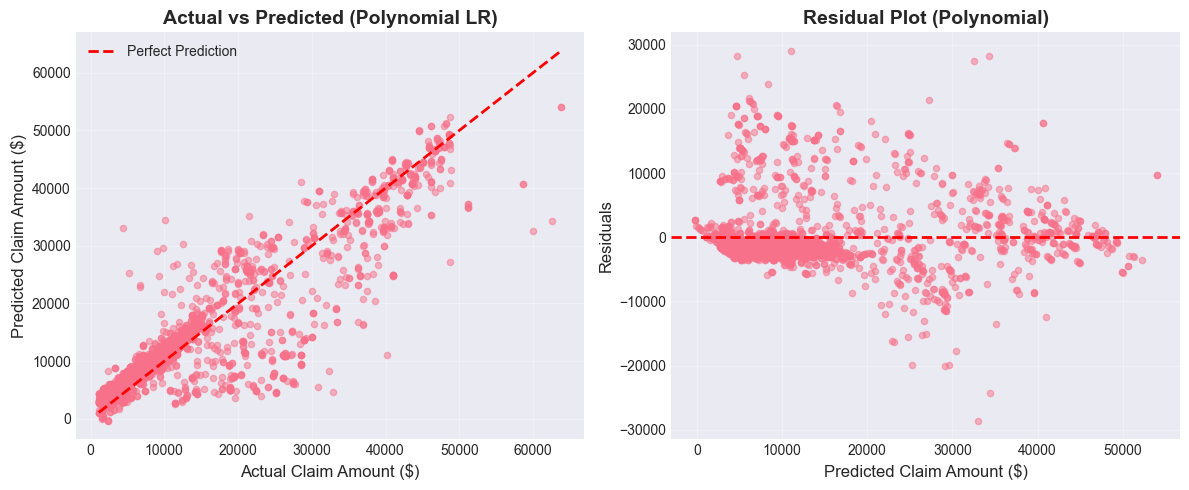

In [14]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial Regression (degree 2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Train Polynomial Regression
poly_lr = LinearRegression()
poly_lr.fit(X_poly_train, y_train)

# Predictions
y_pred_poly = poly_lr.predict(X_poly_test)

# Evaluate Model Performance
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = math.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("="*60)
print("POLYNOMIAL REGRESSION RESULTS (Degree 2)")
print("="*60)
print(f"Mean Absolute Error (MAE): ${mae_poly:.2f}")
print(f"Mean Squared Error (MSE): ${mse_poly:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_poly:.2f}")
print(f"R-squared (R²) Score: {r2_poly:.4f}")

# Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_poly, alpha=0.5, s=20)
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         'r--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Claim Amount ($)', fontsize=12)
plt.ylabel('Predicted Claim Amount ($)', fontsize=12)
plt.title('Actual vs Predicted (Polynomial LR)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
residuals_poly = y_test - y_pred_poly
plt.scatter(y_pred_poly, residuals_poly, alpha=0.5, s=20)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Claim Amount ($)', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residual Plot (Polynomial)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Regression Models Comparison



REGRESSION MODELS COMPARISON
                     Model         MAE          MSE         RMSE  R² Score
  Simple Linear Regression 9174.682717 1.347673e+08 11608.931891  0.083769
Multiple Linear Regression 4110.303938 3.735621e+07  6111.972604  0.746030
     Polynomial Regression 3173.019268 2.657204e+07  5154.807787  0.819347


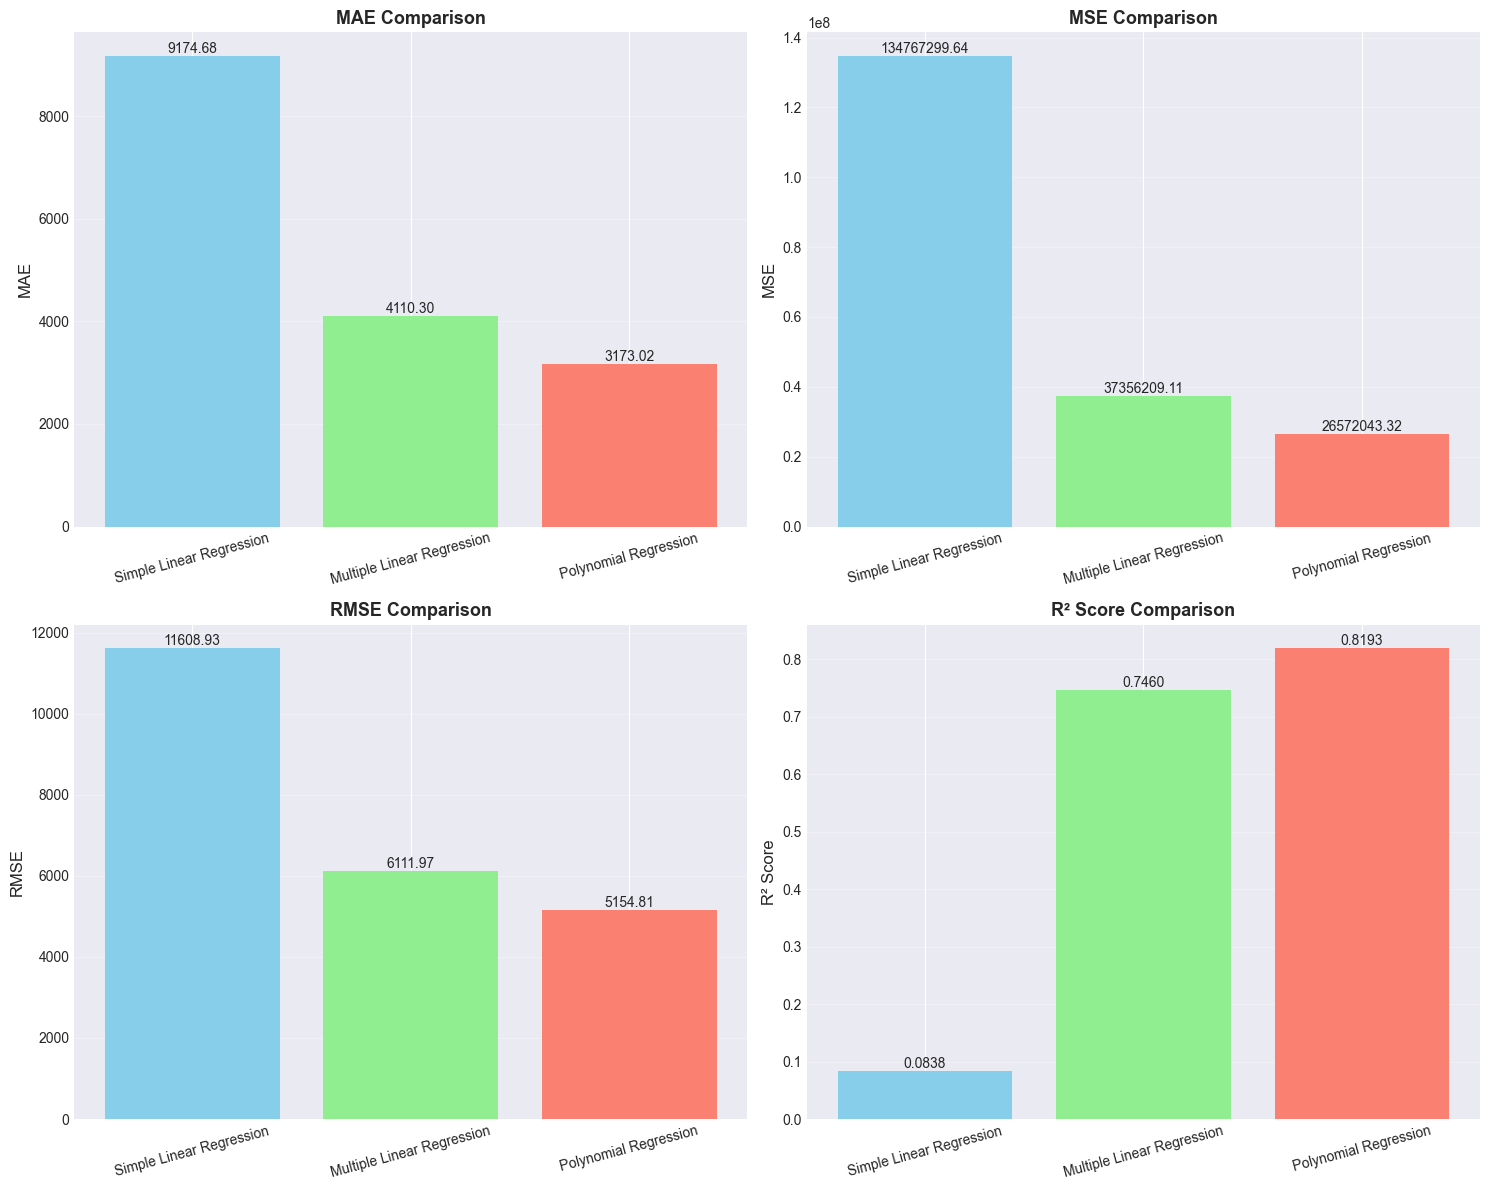

In [15]:
# Compare all regression models
regression_comparison = pd.DataFrame({
    'Model': ['Simple Linear Regression', 'Multiple Linear Regression', 'Polynomial Regression'],
    'MAE': [mae_simple, mae_multiple, mae_poly],
    'MSE': [mse_simple, mse_multiple, mse_poly],
    'RMSE': [rmse_simple, rmse_multiple, rmse_poly],
    'R² Score': [r2_simple, r2_multiple, r2_poly]
})

print("="*60)
print("REGRESSION MODELS COMPARISON")
print("="*60)
print(regression_comparison.to_string(index=False))

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

metrics = ['MAE', 'MSE', 'RMSE', 'R² Score']
for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    bars = ax.bar(regression_comparison['Model'], regression_comparison[metric], 
                   color=['skyblue', 'lightgreen', 'salmon'])
    ax.set_title(f'{metric} Comparison', fontsize=13, fontweight='bold')
    ax.set_ylabel(metric, fontsize=12)
    ax.tick_params(axis='x', rotation=15)
    ax.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}' if metric != 'R² Score' else f'{height:.4f}',
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


# UNIT III: SUPERVISED LEARNING - CLASSIFICATION

## Convert Regression Problem to Classification

We'll create a binary classification problem by categorizing claims as "High" or "Low" based on the median claim amount.


In [16]:
# Create binary classification target (High/Low claim)
# IMPORTANT: Use the same filtered X and y that were used for regression
# This ensures consistent data across regression and classification

# Ensure X and y exist and are properly filtered
if 'X' not in globals() or 'y' not in globals():
    # If X and y don't exist, create them (same logic as Multiple Linear Regression)
    if 'df_clean' not in globals():
        df_clean = df.copy()
        df_clean['bmi'].fillna(df_clean['bmi'].median(), inplace=True)
        df_clean['bloodpressure'].fillna(df_clean['bloodpressure'].median(), inplace=True)
        df_clean = df_clean.drop_duplicates()
    
    if 'sex_encoded' not in df_clean.columns:
        from sklearn.preprocessing import LabelEncoder
        label_encoders = {}
        categorical_features = ['sex', 'hereditary_diseases', 'city', 'job_title']
        for col in categorical_features:
            le = LabelEncoder()
            df_clean[col + '_encoded'] = le.fit_transform(df_clean[col].astype(str))
            label_encoders[col] = le
    
    feature_cols = ['age', 'weight', 'bmi', 'no_of_dependents', 'smoker', 
                    'bloodpressure', 'diabetes', 'regular_ex',
                    'sex_encoded', 'hereditary_diseases_encoded', 
                    'city_encoded', 'job_title_encoded']
    X = df_clean[feature_cols]
    y = df_clean['claim']
    
    # Drop rows with any NaN values
    mask = ~(X.isnull().any(axis=1) | y.isnull())
    X = X[mask]
    y = y[mask]

# Create classification target from the filtered y (same length as X)
median_claim = y.median()
y_classification = (y > median_claim).astype(int)

print(f"Median claim amount: ${median_claim:.2f}")
print(f"\nClass distribution:")
print(f"Low Claim (0): {(y_classification == 0).sum()} ({((y_classification == 0).sum() / len(y_classification)) * 100:.2f}%)")
print(f"High Claim (1): {(y_classification == 1).sum()} ({((y_classification == 1).sum() / len(y_classification)) * 100:.2f}%)")
print(f"\nData shapes - X: {X.shape}, y_classification: {y_classification.shape}")
print(f"Lengths match: {len(X) == len(y_classification)}")

# Split data for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_classification, test_size=0.2, random_state=42, stratify=y_classification
)


Median claim amount: $9715.80

Class distribution:
Low Claim (0): 6786 (50.11%)
High Claim (1): 6757 (49.89%)

Data shapes - X: (13543, 12), y_classification: (13543,)
Lengths match: True


## Logistic Regression


LOGISTIC REGRESSION RESULTS
Accuracy: 0.8885
Logarithmic Loss: 0.3272
Area Under Curve (AUC): 0.9358
Precision: 0.8900
Recall: 0.8861
F1 Score: 0.8881

CONFUSION MATRIX
[[1209  148]
 [ 154 1198]]

True Negatives: 1209, False Positives: 148
False Negatives: 154, True Positives: 1198


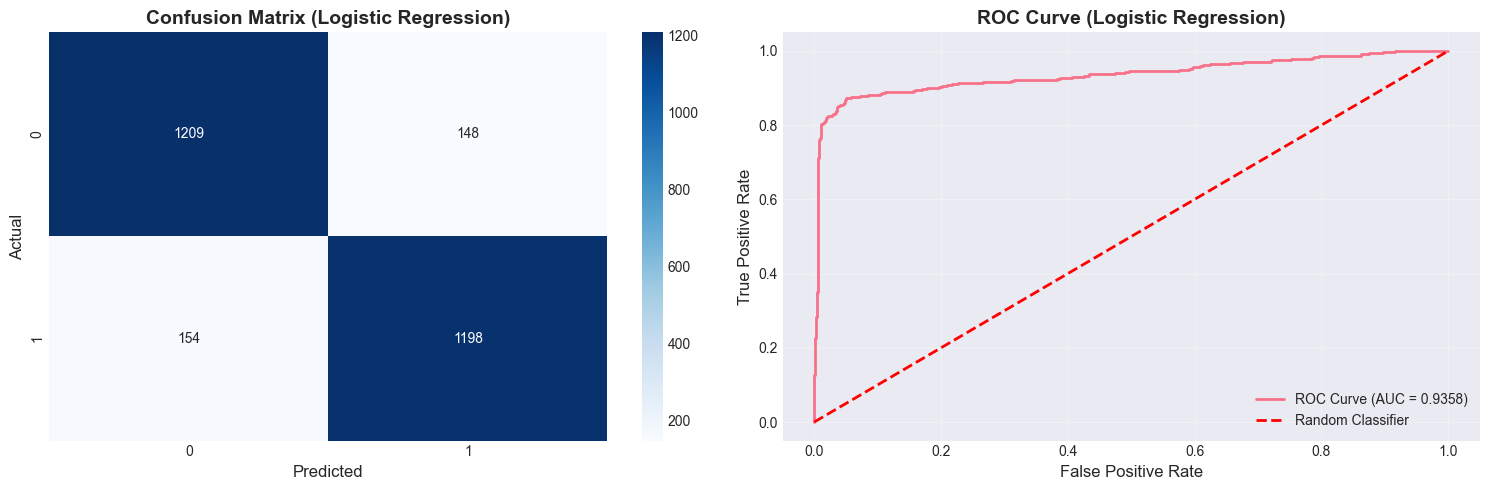

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_clf, y_train_clf)

# Predictions
y_pred_log = log_reg.predict(X_test_clf)
y_pred_proba_log = log_reg.predict_proba(X_test_clf)[:, 1]

# Evaluate Model Performance
accuracy_log = accuracy_score(y_test_clf, y_pred_log)
log_loss_log = log_loss(y_test_clf, y_pred_proba_log)
roc_auc_log = roc_auc_score(y_test_clf, y_pred_proba_log)
precision_log = precision_score(y_test_clf, y_pred_log)
recall_log = recall_score(y_test_clf, y_pred_log)
f1_log = f1_score(y_test_clf, y_pred_log)
cm_log = confusion_matrix(y_test_clf, y_pred_log)

print("="*60)
print("LOGISTIC REGRESSION RESULTS")
print("="*60)
print(f"Accuracy: {accuracy_log:.4f}")
print(f"Logarithmic Loss: {log_loss_log:.4f}")
print(f"Area Under Curve (AUC): {roc_auc_log:.4f}")
print(f"Precision: {precision_log:.4f}")
print(f"Recall: {recall_log:.4f}")
print(f"F1 Score: {f1_log:.4f}")

print("\n" + "="*60)
print("CONFUSION MATRIX")
print("="*60)
print(cm_log)
print(f"\nTrue Negatives: {cm_log[0,0]}, False Positives: {cm_log[0,1]}")
print(f"False Negatives: {cm_log[1,0]}, True Positives: {cm_log[1,1]}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Confusion Matrix
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix (Logistic Regression)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Actual', fontsize=12)
axes[0].set_xlabel('Predicted', fontsize=12)

# ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_clf, y_pred_proba_log)
axes[1].plot(fpr, tpr, linewidth=2, label=f'ROC Curve (AUC = {roc_auc_log:.4f})')
axes[1].plot([0, 1], [0, 1], 'r--', linewidth=2, label='Random Classifier')
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate', fontsize=12)
axes[1].set_title('ROC Curve (Logistic Regression)', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## K-Nearest Neighbors (KNN)


K-NEAREST NEIGHBORS (KNN) RESULTS (k=5)
Accuracy: 0.9646
Logarithmic Loss: 0.3076
Area Under Curve (AUC): 0.9895
Precision: 0.9736
Recall: 0.9549
F1 Score: 0.9642

CONFUSION MATRIX
[[1322   35]
 [  61 1291]]


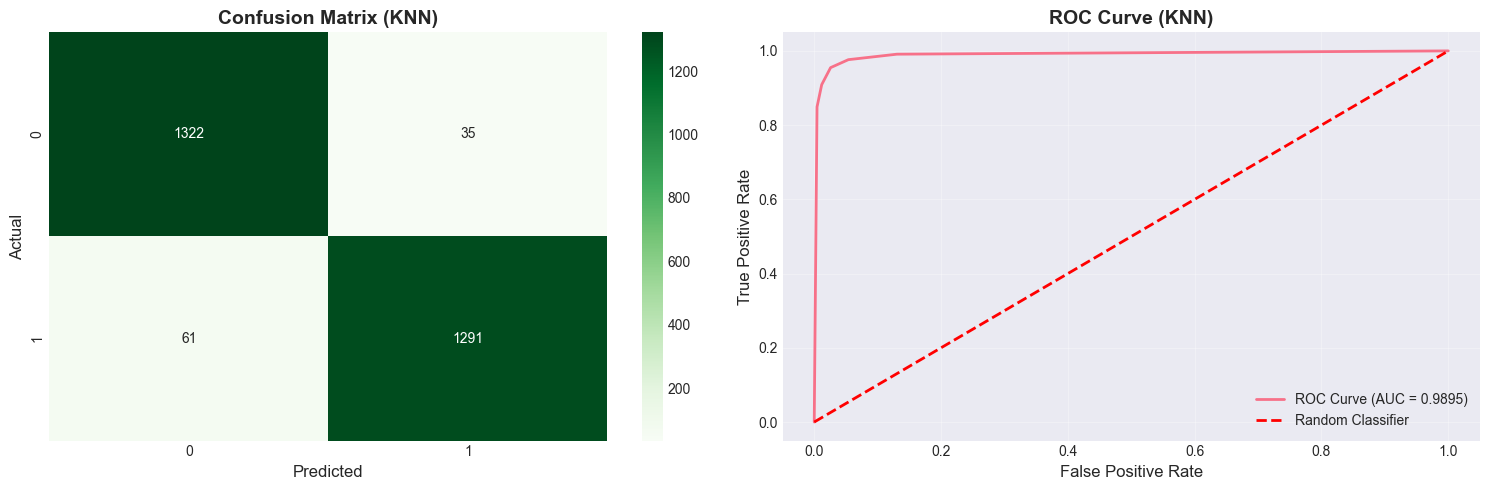

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Scale features for KNN (important for distance-based algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clf)
X_test_scaled = scaler.transform(X_test_clf)

# Train KNN (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train_clf)

# Predictions
y_pred_knn = knn.predict(X_test_scaled)
y_pred_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]

# Evaluate Model Performance
accuracy_knn = accuracy_score(y_test_clf, y_pred_knn)
log_loss_knn = log_loss(y_test_clf, y_pred_proba_knn)
roc_auc_knn = roc_auc_score(y_test_clf, y_pred_proba_knn)
precision_knn = precision_score(y_test_clf, y_pred_knn)
recall_knn = recall_score(y_test_clf, y_pred_knn)
f1_knn = f1_score(y_test_clf, y_pred_knn)
cm_knn = confusion_matrix(y_test_clf, y_pred_knn)

print("="*60)
print("K-NEAREST NEIGHBORS (KNN) RESULTS (k=5)")
print("="*60)
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Logarithmic Loss: {log_loss_knn:.4f}")
print(f"Area Under Curve (AUC): {roc_auc_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")

print("\n" + "="*60)
print("CONFUSION MATRIX")
print("="*60)
print(cm_knn)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens', ax=axes[0])
axes[0].set_title('Confusion Matrix (KNN)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Actual', fontsize=12)
axes[0].set_xlabel('Predicted', fontsize=12)

fpr_knn, tpr_knn, _ = roc_curve(y_test_clf, y_pred_proba_knn)
axes[1].plot(fpr_knn, tpr_knn, linewidth=2, label=f'ROC Curve (AUC = {roc_auc_knn:.4f})')
axes[1].plot([0, 1], [0, 1], 'r--', linewidth=2, label='Random Classifier')
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate', fontsize=12)
axes[1].set_title('ROC Curve (KNN)', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Naive Bayes


NAIVE BAYES RESULTS
Accuracy: 0.6888
Logarithmic Loss: 1.0791
Area Under Curve (AUC): 0.9308
Precision: 0.9848
Recall: 0.3824
F1 Score: 0.5509

CONFUSION MATRIX
[[1349    8]
 [ 835  517]]


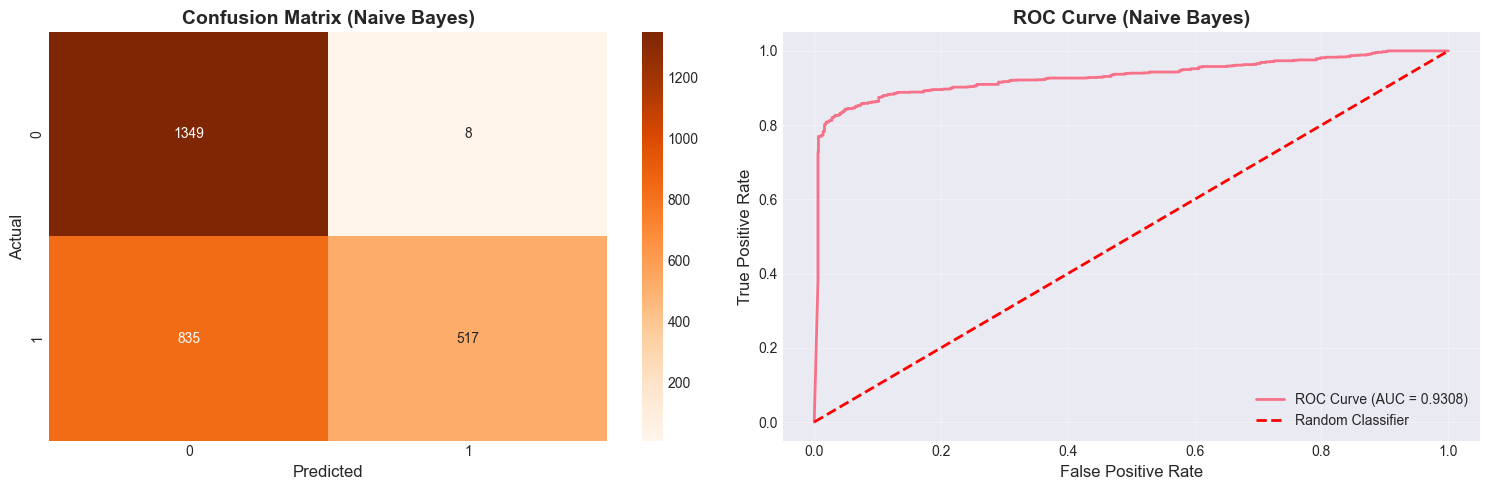

In [19]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes
nb = GaussianNB()
nb.fit(X_train_clf, y_train_clf)

# Predictions
y_pred_nb = nb.predict(X_test_clf)
y_pred_proba_nb = nb.predict_proba(X_test_clf)[:, 1]

# Evaluate Model Performance
accuracy_nb = accuracy_score(y_test_clf, y_pred_nb)
log_loss_nb = log_loss(y_test_clf, y_pred_proba_nb)
roc_auc_nb = roc_auc_score(y_test_clf, y_pred_proba_nb)
precision_nb = precision_score(y_test_clf, y_pred_nb)
recall_nb = recall_score(y_test_clf, y_pred_nb)
f1_nb = f1_score(y_test_clf, y_pred_nb)
cm_nb = confusion_matrix(y_test_clf, y_pred_nb)

print("="*60)
print("NAIVE BAYES RESULTS")
print("="*60)
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Logarithmic Loss: {log_loss_nb:.4f}")
print(f"Area Under Curve (AUC): {roc_auc_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1 Score: {f1_nb:.4f}")

print("\n" + "="*60)
print("CONFUSION MATRIX")
print("="*60)
print(cm_nb)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Oranges', ax=axes[0])
axes[0].set_title('Confusion Matrix (Naive Bayes)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Actual', fontsize=12)
axes[0].set_xlabel('Predicted', fontsize=12)

fpr_nb, tpr_nb, _ = roc_curve(y_test_clf, y_pred_proba_nb)
axes[1].plot(fpr_nb, tpr_nb, linewidth=2, label=f'ROC Curve (AUC = {roc_auc_nb:.4f})')
axes[1].plot([0, 1], [0, 1], 'r--', linewidth=2, label='Random Classifier')
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate', fontsize=12)
axes[1].set_title('ROC Curve (Naive Bayes)', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Decision Tree


DECISION TREE RESULTS
Accuracy: 0.9254
Logarithmic Loss: 0.2254
Area Under Curve (AUC): 0.9452
Precision: 0.9824
Recall: 0.8661
F1 Score: 0.9206

CONFUSION MATRIX
[[1336   21]
 [ 181 1171]]

FEATURE IMPORTANCE
                        Feature  Importance
0                           age    0.469395
4                        smoker    0.443109
3              no_of_dependents    0.050348
5                 bloodpressure    0.012743
9   hereditary_diseases_encoded    0.008803
8                   sex_encoded    0.005173
1                        weight    0.004201
11            job_title_encoded    0.002503
6                      diabetes    0.001687
2                           bmi    0.001140


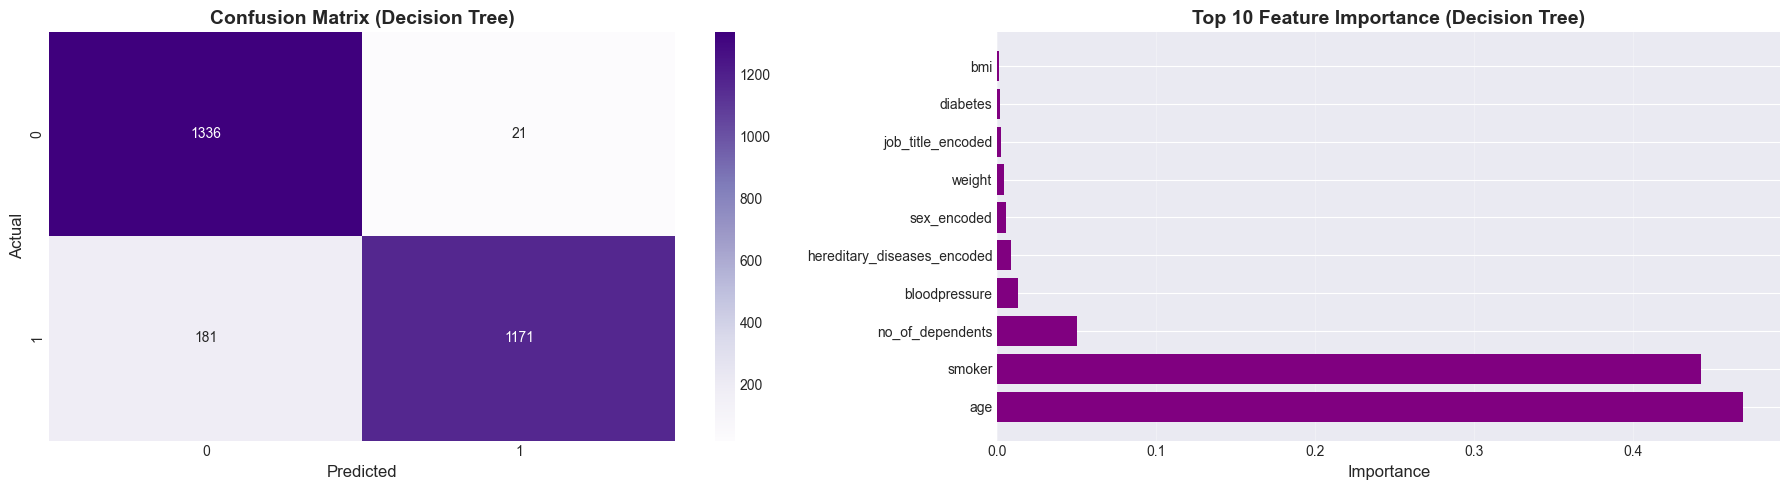

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train_clf, y_train_clf)

# Predictions
y_pred_dt = dt.predict(X_test_clf)
y_pred_proba_dt = dt.predict_proba(X_test_clf)[:, 1]

# Evaluate Model Performance
accuracy_dt = accuracy_score(y_test_clf, y_pred_dt)
log_loss_dt = log_loss(y_test_clf, y_pred_proba_dt)
roc_auc_dt = roc_auc_score(y_test_clf, y_pred_proba_dt)
precision_dt = precision_score(y_test_clf, y_pred_dt)
recall_dt = recall_score(y_test_clf, y_pred_dt)
f1_dt = f1_score(y_test_clf, y_pred_dt)
cm_dt = confusion_matrix(y_test_clf, y_pred_dt)

print("="*60)
print("DECISION TREE RESULTS")
print("="*60)
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Logarithmic Loss: {log_loss_dt:.4f}")
print(f"Area Under Curve (AUC): {roc_auc_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")

print("\n" + "="*60)
print("CONFUSION MATRIX")
print("="*60)
print(cm_dt)

# Feature importance
feature_importance_dt = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': dt.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n" + "="*60)
print("FEATURE IMPORTANCE")
print("="*60)
print(feature_importance_dt.head(10))

# ROC Curve calculation (needed for comparison plot)
from sklearn.metrics import roc_curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_clf, y_pred_proba_dt)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Purples', ax=axes[0])
axes[0].set_title('Confusion Matrix (Decision Tree)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Actual', fontsize=12)
axes[0].set_xlabel('Predicted', fontsize=12)

# Feature importance plot
top_features = feature_importance_dt.head(10)
axes[1].barh(top_features['Feature'], top_features['Importance'], color='purple')
axes[1].set_xlabel('Importance', fontsize=12)
axes[1].set_title('Top 10 Feature Importance (Decision Tree)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


## Support Vector Machine (SVM)


SUPPORT VECTOR MACHINE (SVM) RESULTS
Accuracy: 0.9361
Logarithmic Loss: 0.2135
Area Under Curve (AUC): 0.9574
Precision: 0.9773
Recall: 0.8928
F1 Score: 0.9331

CONFUSION MATRIX
[[1329   28]
 [ 145 1207]]


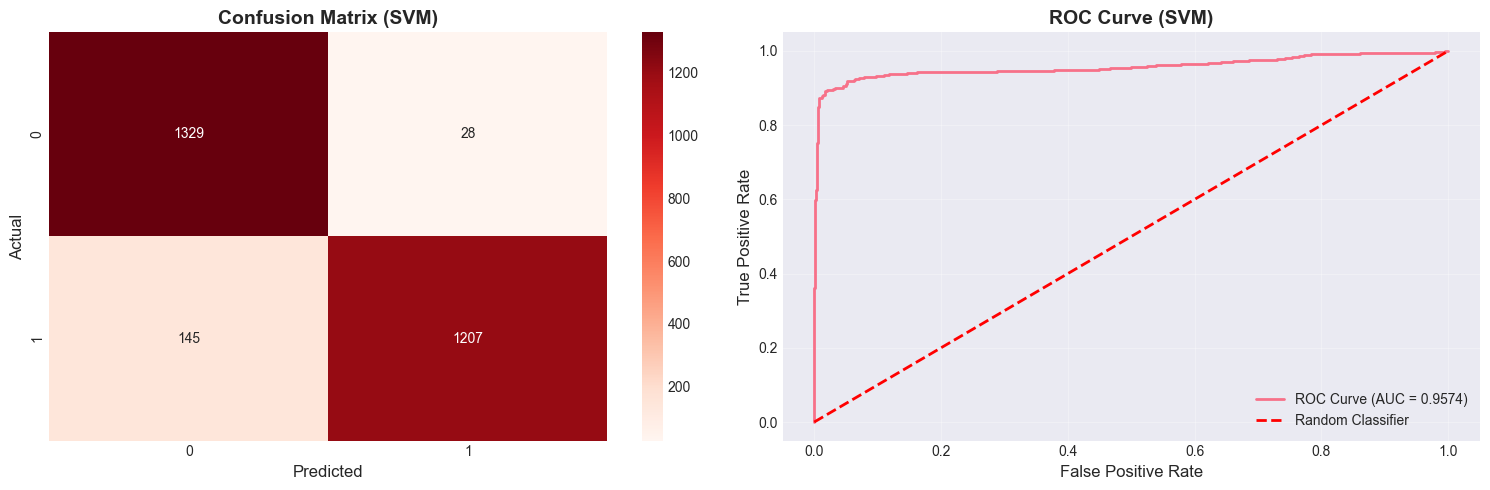

In [21]:
from sklearn.svm import SVC

# Train SVM (using scaled features)
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train_clf)

# Predictions
y_pred_svm = svm.predict(X_test_scaled)
y_pred_proba_svm = svm.predict_proba(X_test_scaled)[:, 1]

# Evaluate Model Performance
accuracy_svm = accuracy_score(y_test_clf, y_pred_svm)
log_loss_svm = log_loss(y_test_clf, y_pred_proba_svm)
roc_auc_svm = roc_auc_score(y_test_clf, y_pred_proba_svm)
precision_svm = precision_score(y_test_clf, y_pred_svm)
recall_svm = recall_score(y_test_clf, y_pred_svm)
f1_svm = f1_score(y_test_clf, y_pred_svm)
cm_svm = confusion_matrix(y_test_clf, y_pred_svm)

print("="*60)
print("SUPPORT VECTOR MACHINE (SVM) RESULTS")
print("="*60)
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Logarithmic Loss: {log_loss_svm:.4f}")
print(f"Area Under Curve (AUC): {roc_auc_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")

print("\n" + "="*60)
print("CONFUSION MATRIX")
print("="*60)
print(cm_svm)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Reds', ax=axes[0])
axes[0].set_title('Confusion Matrix (SVM)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Actual', fontsize=12)
axes[0].set_xlabel('Predicted', fontsize=12)

fpr_svm, tpr_svm, _ = roc_curve(y_test_clf, y_pred_proba_svm)
axes[1].plot(fpr_svm, tpr_svm, linewidth=2, label=f'ROC Curve (AUC = {roc_auc_svm:.4f})')
axes[1].plot([0, 1], [0, 1], 'r--', linewidth=2, label='Random Classifier')
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate', fontsize=12)
axes[1].set_title('ROC Curve (SVM)', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Classification Models Comparison


CLASSIFICATION MODELS COMPARISON
                 Model  Accuracy  Log Loss      AUC  Precision   Recall  F1 Score
   Logistic Regression  0.888520  0.327173 0.935847   0.890045 0.886095  0.888065
   K-Nearest Neighbors  0.964563  0.307647 0.989542   0.973605 0.954882  0.964152
           Naive Bayes  0.688815  1.079079 0.930768   0.984762 0.382396  0.550879
         Decision Tree  0.925434  0.225389 0.945230   0.982383 0.866124  0.920597
Support Vector Machine  0.936139  0.213450 0.957370   0.977328 0.892751  0.933127


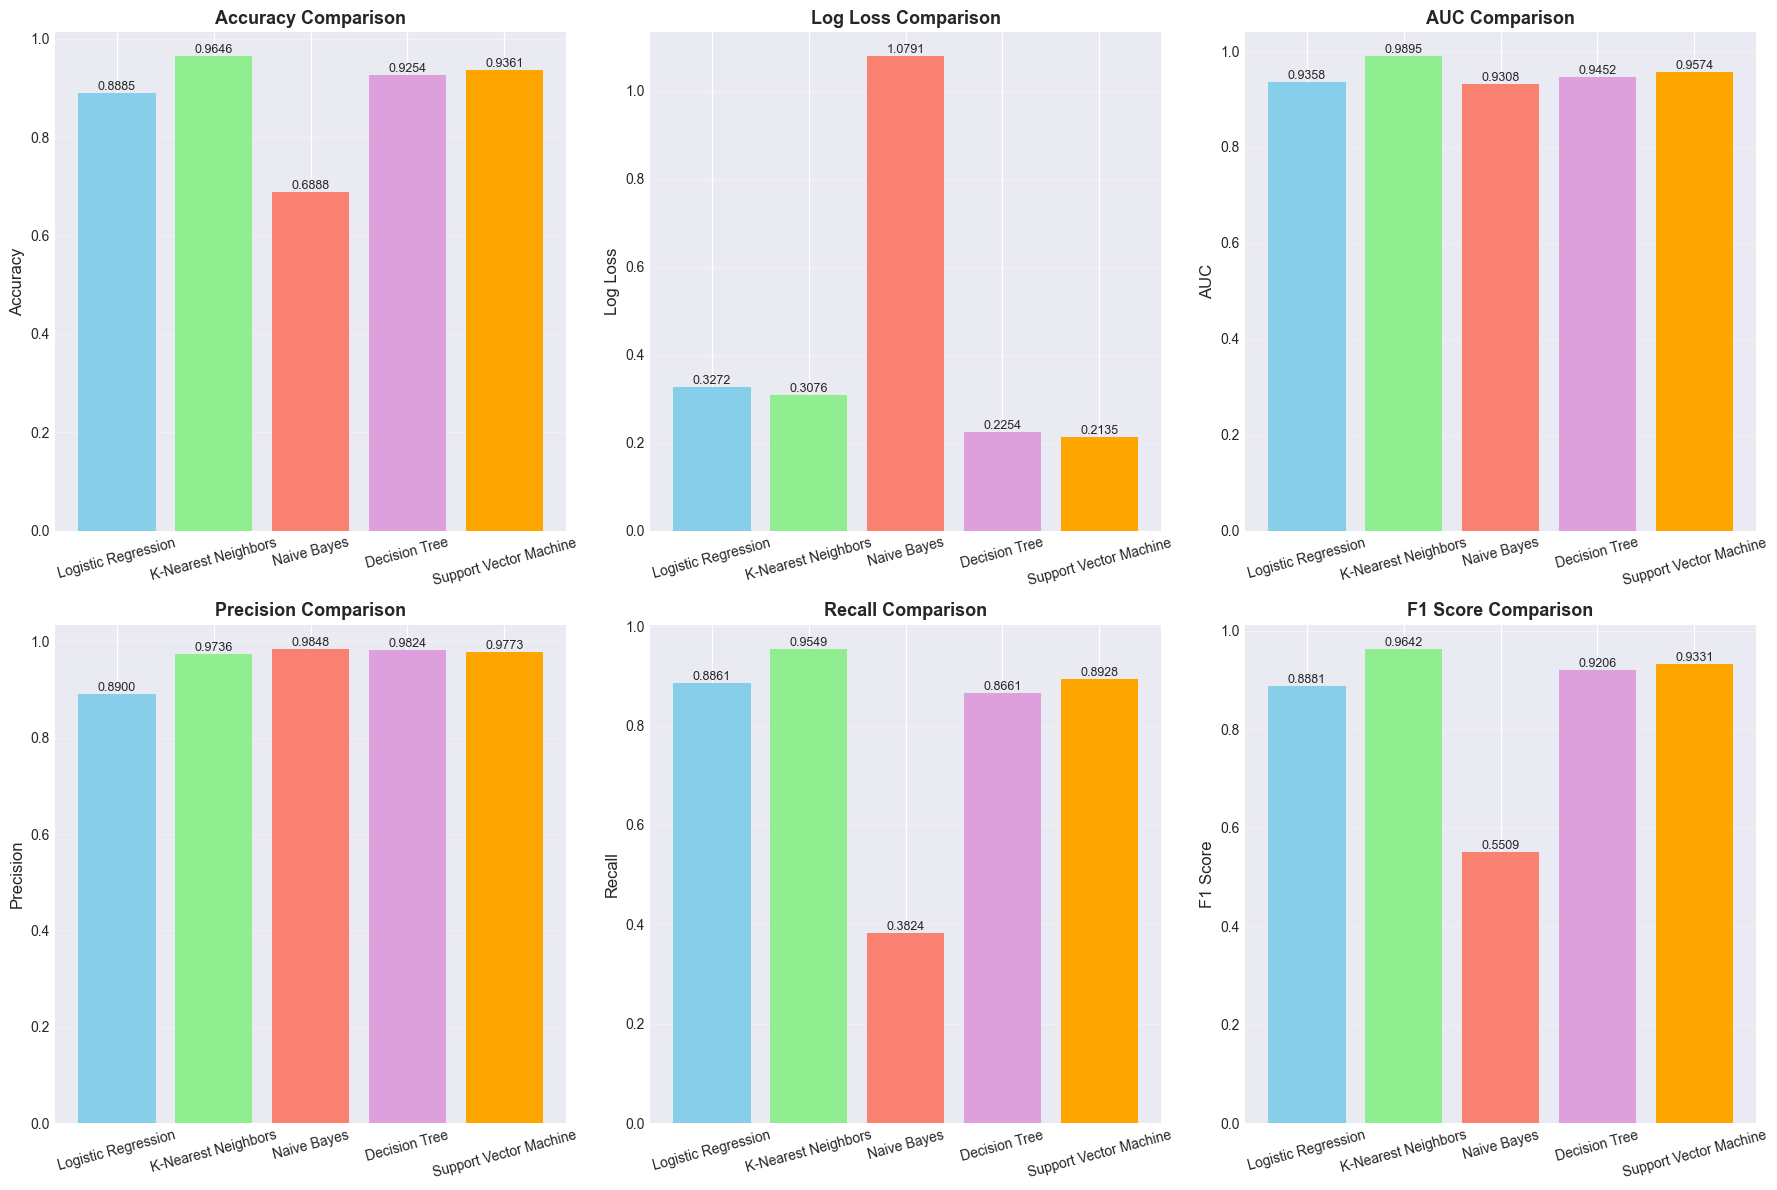

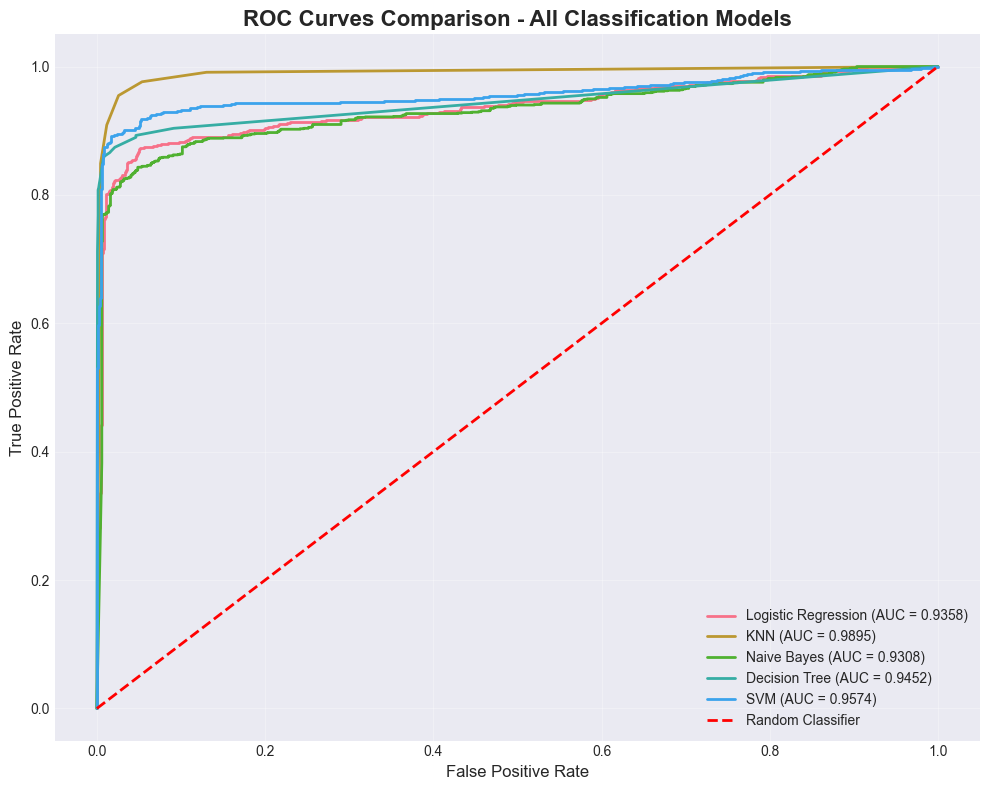

In [22]:
# Compare all classification models
classification_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-Nearest Neighbors', 'Naive Bayes', 
              'Decision Tree', 'Support Vector Machine'],
    'Accuracy': [accuracy_log, accuracy_knn, accuracy_nb, accuracy_dt, accuracy_svm],
    'Log Loss': [log_loss_log, log_loss_knn, log_loss_nb, log_loss_dt, log_loss_svm],
    'AUC': [roc_auc_log, roc_auc_knn, roc_auc_nb, roc_auc_dt, roc_auc_svm],
    'Precision': [precision_log, precision_knn, precision_nb, precision_dt, precision_svm],
    'Recall': [recall_log, recall_knn, recall_nb, recall_dt, recall_svm],
    'F1 Score': [f1_log, f1_knn, f1_nb, f1_dt, f1_svm]
})

print("="*60)
print("CLASSIFICATION MODELS COMPARISON")
print("="*60)
print(classification_comparison.to_string(index=False))

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

metrics_clf = ['Accuracy', 'Log Loss', 'AUC', 'Precision', 'Recall', 'F1 Score']
for idx, metric in enumerate(metrics_clf):
    ax = axes[idx // 3, idx % 3]
    bars = ax.bar(classification_comparison['Model'], classification_comparison[metric],
                   color=['skyblue', 'lightgreen', 'salmon', 'plum', 'orange'])
    ax.set_title(f'{metric} Comparison', fontsize=13, fontweight='bold')
    ax.set_ylabel(metric, fontsize=12)
    ax.tick_params(axis='x', rotation=15)
    ax.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# ROC Curves Comparison
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, linewidth=2, label=f'Logistic Regression (AUC = {roc_auc_log:.4f})')
plt.plot(fpr_knn, tpr_knn, linewidth=2, label=f'KNN (AUC = {roc_auc_knn:.4f})')
plt.plot(fpr_nb, tpr_nb, linewidth=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.4f})')
plt.plot(fpr_dt, tpr_dt, linewidth=2, label=f'Decision Tree (AUC = {roc_auc_dt:.4f})')
plt.plot(fpr_svm, tpr_svm, linewidth=2, label=f'SVM (AUC = {roc_auc_svm:.4f})')
plt.plot([0, 1], [0, 1], 'r--', linewidth=2, label='Random Classifier')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves Comparison - All Classification Models', fontsize=16, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# UNIT IV: UNSUPERVISED LEARNING - CLUSTERING AND PATTERN DETECTION

## K-Means Clustering


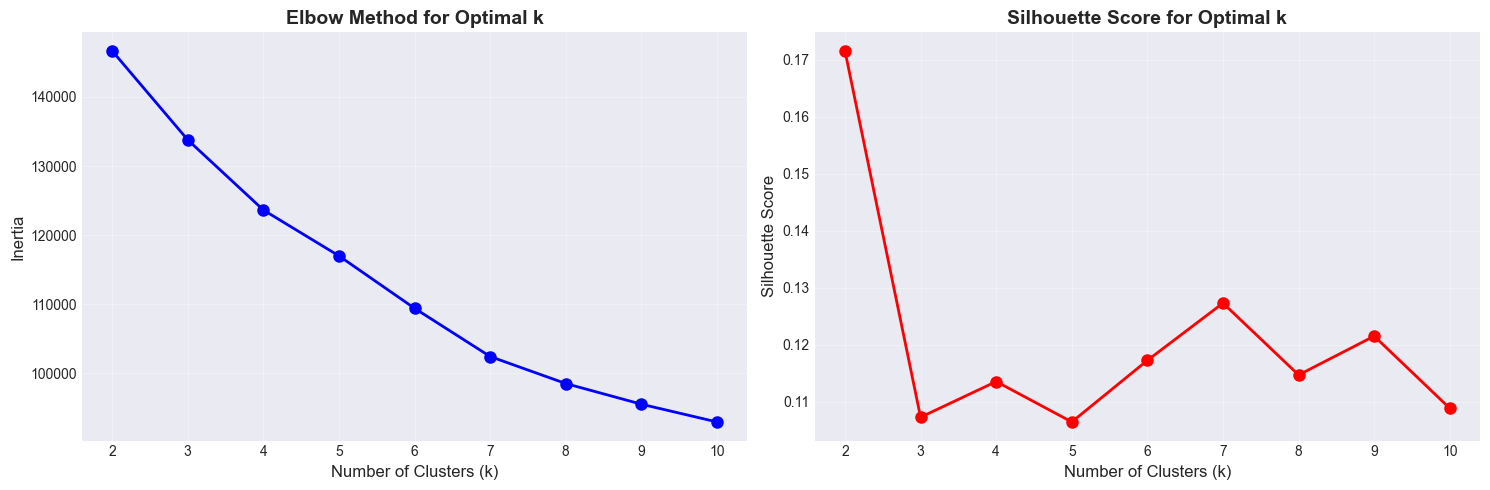

Optimal number of clusters (based on silhouette score): 2
Best silhouette score: 0.1716


In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Prepare data for clustering (use scaled features)
X_cluster = scaler.fit_transform(X)

# Determine optimal number of clusters using Elbow Method
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_cluster, kmeans.labels_))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Elbow Method
axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0].set_ylabel('Inertia', fontsize=12)
axes[0].set_title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Silhouette Score
axes[1].plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score for Optimal k', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find optimal k (highest silhouette score)
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters (based on silhouette score): {optimal_k}")
print(f"Best silhouette score: {max(silhouette_scores):.4f}")


K-MEANS CLUSTERING RESULTS (k=2)

Cluster Distribution:
cluster
0     2777
1    10766
Name: count, dtype: int64

CLUSTER CHARACTERISTICS
           age    bmi     claim  smoker  diabetes
cluster                                          
0        38.97  30.53  32139.71    0.99      0.82
1        39.71  30.16   8745.91    0.00      0.76


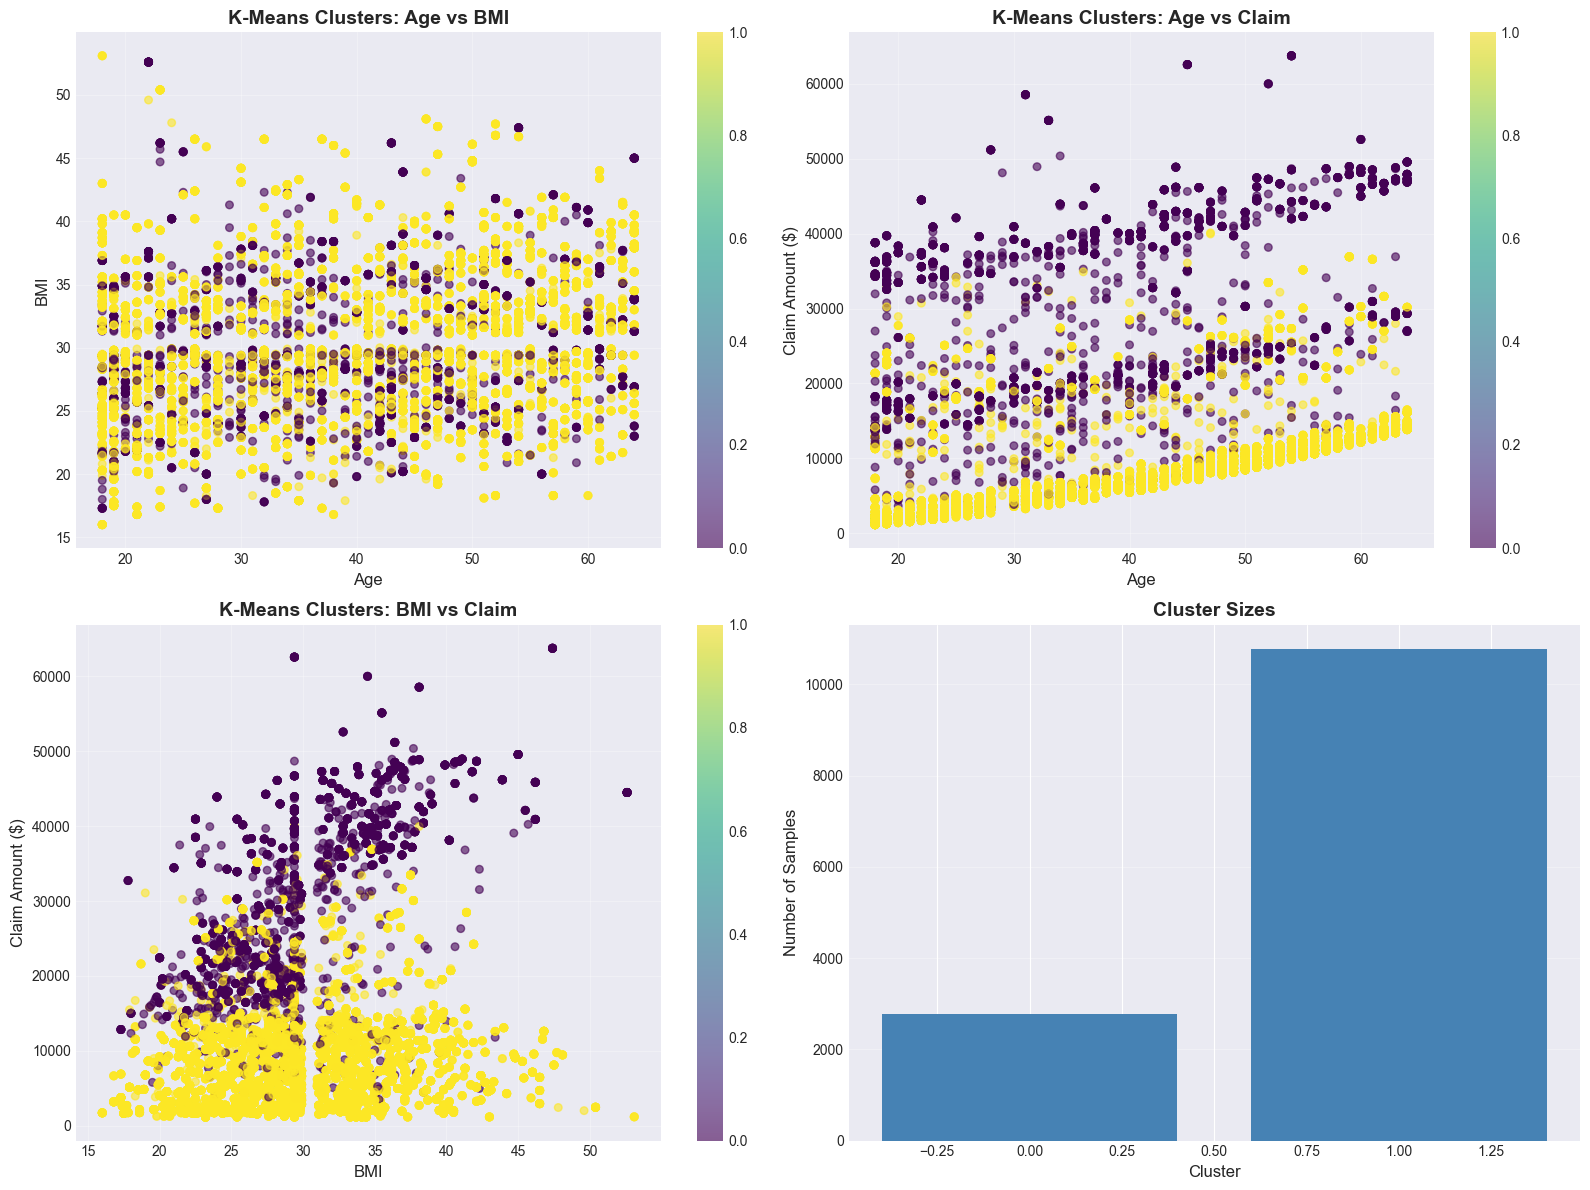

In [24]:
# Apply K-Means with optimal k
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_optimal.fit_predict(X_cluster)

# Create a filtered dataframe that matches X (for visualization)
# X has been filtered to remove NaN, so we need to use the same filtered data
df_clustered = df_clean.loc[X.index].copy()  # Use indices from filtered X
df_clustered['cluster'] = cluster_labels

# Analyze clusters
print("="*60)
print(f"K-MEANS CLUSTERING RESULTS (k={optimal_k})")
print("="*60)
print(f"\nCluster Distribution:")
print(df_clustered['cluster'].value_counts().sort_index())

print("\n" + "="*60)
print("CLUSTER CHARACTERISTICS")
print("="*60)
cluster_analysis = df_clustered.groupby('cluster').agg({
    'age': 'mean',
    'bmi': 'mean',
    'claim': 'mean',
    'smoker': 'mean',
    'diabetes': 'mean'
}).round(2)
print(cluster_analysis)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Age vs BMI colored by cluster
scatter1 = axes[0, 0].scatter(df_clustered['age'], df_clustered['bmi'], c=cluster_labels, 
                              cmap='viridis', alpha=0.6, s=30)
axes[0, 0].set_xlabel('Age', fontsize=12)
axes[0, 0].set_ylabel('BMI', fontsize=12)
axes[0, 0].set_title('K-Means Clusters: Age vs BMI', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0, 0])

# Age vs Claim colored by cluster
scatter2 = axes[0, 1].scatter(df_clustered['age'], df_clustered['claim'], c=cluster_labels, 
                              cmap='viridis', alpha=0.6, s=30)
axes[0, 1].set_xlabel('Age', fontsize=12)
axes[0, 1].set_ylabel('Claim Amount ($)', fontsize=12)
axes[0, 1].set_title('K-Means Clusters: Age vs Claim', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[0, 1])

# BMI vs Claim colored by cluster
scatter3 = axes[1, 0].scatter(df_clustered['bmi'], df_clustered['claim'], c=cluster_labels, 
                              cmap='viridis', alpha=0.6, s=30)
axes[1, 0].set_xlabel('BMI', fontsize=12)
axes[1, 0].set_ylabel('Claim Amount ($)', fontsize=12)
axes[1, 0].set_title('K-Means Clusters: BMI vs Claim', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
plt.colorbar(scatter3, ax=axes[1, 0])

# Cluster sizes
cluster_counts = df_clustered['cluster'].value_counts().sort_index()
axes[1, 1].bar(cluster_counts.index, cluster_counts.values, color='steelblue')
axes[1, 1].set_xlabel('Cluster', fontsize=12)
axes[1, 1].set_ylabel('Number of Samples', fontsize=12)
axes[1, 1].set_title('Cluster Sizes', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


## Hierarchical Clustering


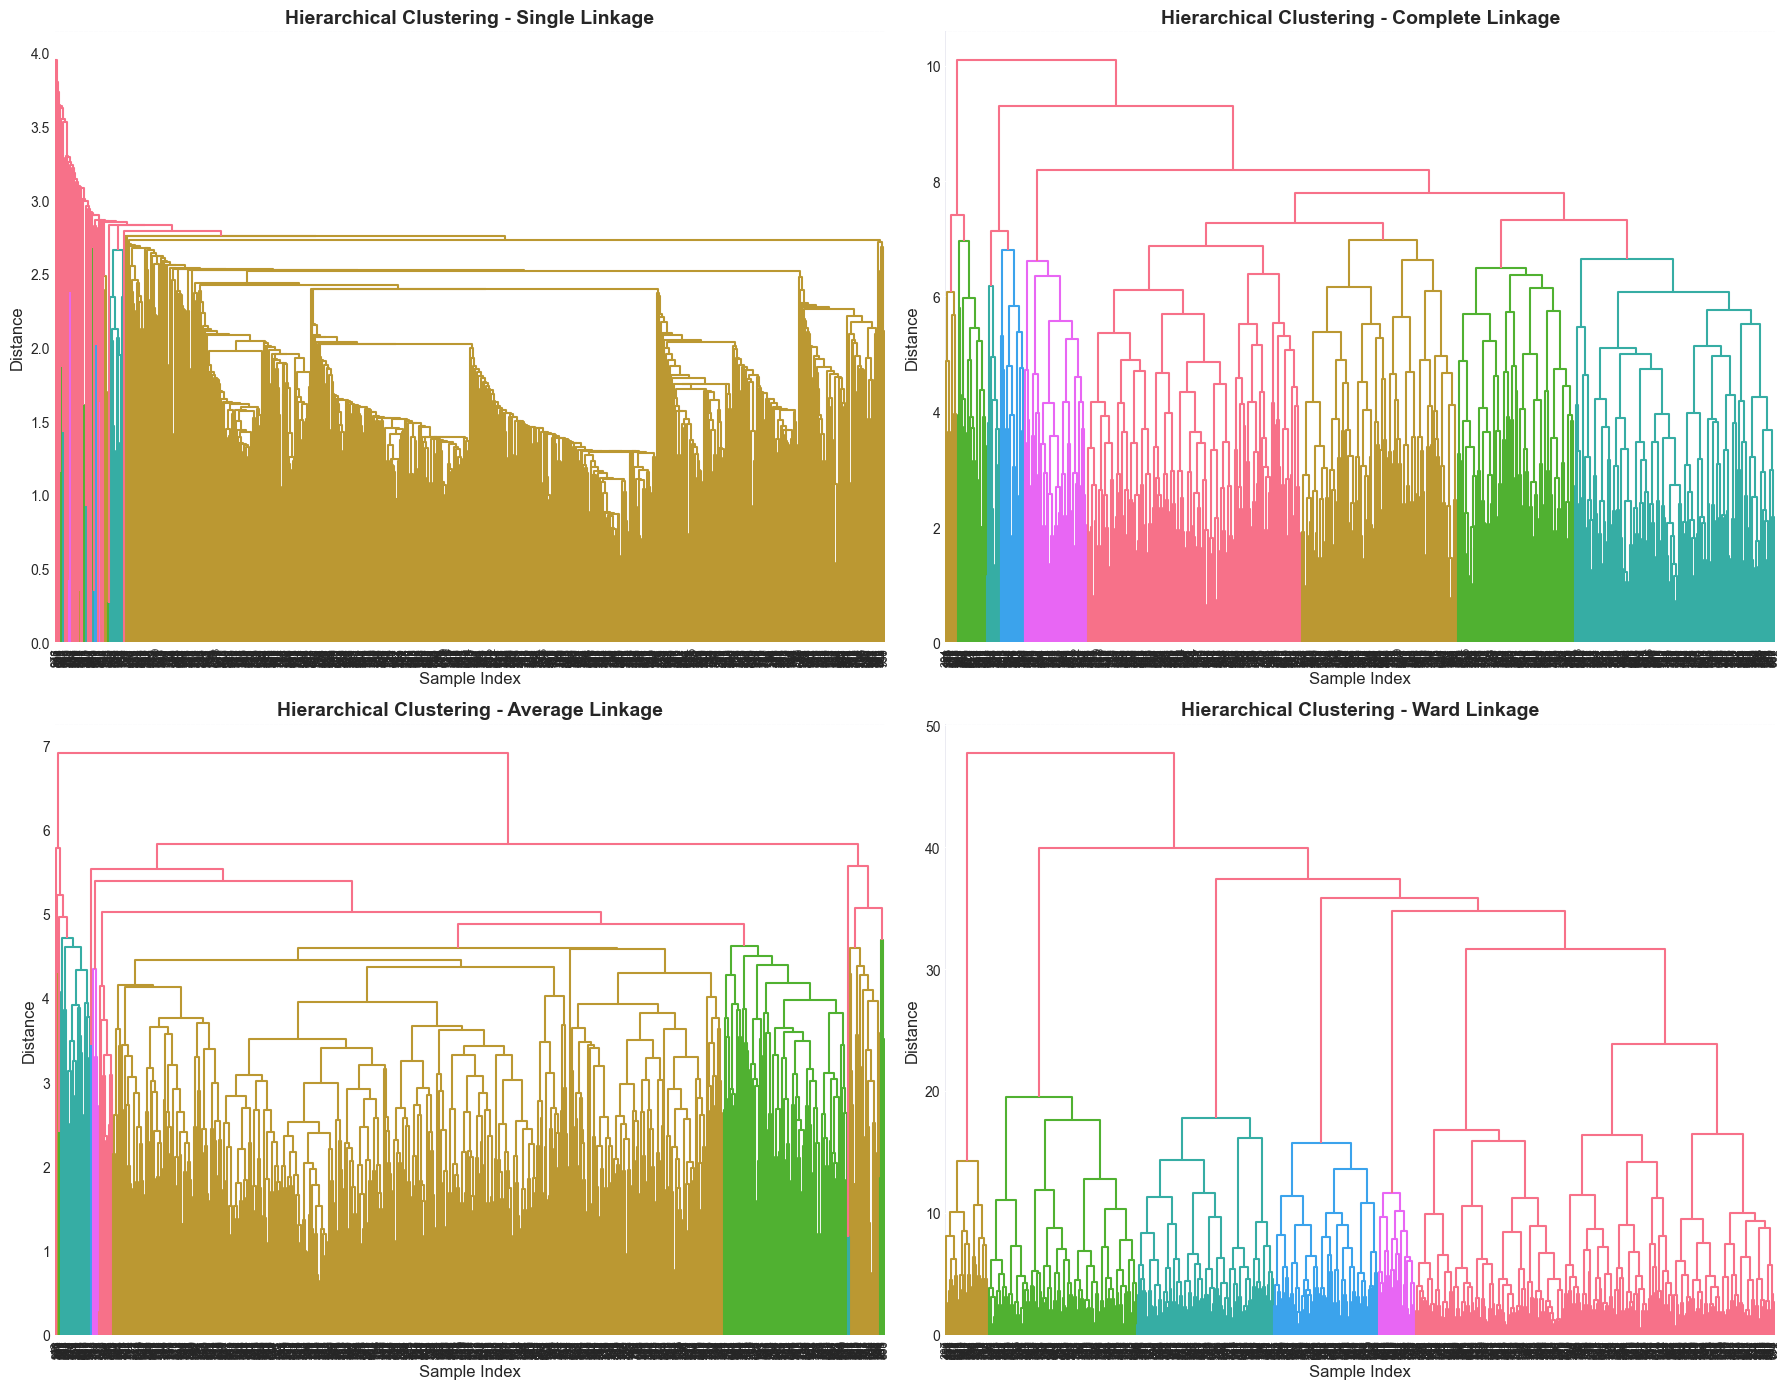

HIERARCHICAL CLUSTERING RESULTS (Average Linkage)
Number of clusters: 2

Cluster Distribution:
Cluster 1: 43 samples
Cluster 2: 957 samples


In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist

# Sample data for hierarchical clustering (to avoid memory issues with large dataset)
sample_size = 1000
np.random.seed(42)
sample_indices = np.random.choice(len(X_cluster), sample_size, replace=False)
X_hierarchical = X_cluster[sample_indices]

# Perform hierarchical clustering with different linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

for idx, method in enumerate(linkage_methods):
    ax = axes[idx // 2, idx % 2]
    
    # Create linkage matrix
    if method == 'ward':
        # Ward method requires Euclidean distance
        Z = linkage(X_hierarchical, method=method)
    else:
        Z = linkage(X_hierarchical, method=method, metric='euclidean')
    
    # Plot dendrogram
    dendrogram(Z, ax=ax, leaf_rotation=90, leaf_font_size=8)
    ax.set_title(f'Hierarchical Clustering - {method.capitalize()} Linkage', 
                 fontsize=14, fontweight='bold')
    ax.set_xlabel('Sample Index', fontsize=12)
    ax.set_ylabel('Distance', fontsize=12)

plt.tight_layout()
plt.show()

# Apply hierarchical clustering with average linkage (most commonly used)
Z_average = linkage(X_hierarchical, method='average', metric='euclidean')
hierarchical_labels = fcluster(Z_average, t=optimal_k, criterion='maxclust')

print("="*60)
print("HIERARCHICAL CLUSTERING RESULTS (Average Linkage)")
print("="*60)
print(f"Number of clusters: {optimal_k}")
print(f"\nCluster Distribution:")
unique, counts = np.unique(hierarchical_labels, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster}: {count} samples")


## Association Rules (Market Basket Analysis)

For association rules, we'll create binary features from categorical variables and find frequent patterns.


In [26]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Create binary features for association rule mining
# Convert categorical variables to binary format
association_data = df_clean.copy()

# Create binary columns for key features
association_data['high_claim'] = (association_data['claim'] > association_data['claim'].median()).astype(int)
association_data['high_bmi'] = (association_data['bmi'] > association_data['bmi'].median()).astype(int)
association_data['high_age'] = (association_data['age'] > association_data['age'].median()).astype(int)
association_data['high_bp'] = (association_data['bloodpressure'] > association_data['bloodpressure'].median()).astype(int)

# Prepare transaction data
transactions = []
for idx, row in association_data.iterrows():
    transaction = []
    if row['smoker'] == 1:
        transaction.append('Smoker')
    if row['diabetes'] == 1:
        transaction.append('Diabetes')
    if row['regular_ex'] == 1:
        transaction.append('Regular_Exercise')
    if row['high_claim'] == 1:
        transaction.append('High_Claim')
    if row['high_bmi'] == 1:
        transaction.append('High_BMI')
    if row['high_age'] == 1:
        transaction.append('High_Age')
    if row['high_bp'] == 1:
        transaction.append('High_BP')
    if row['sex'] == 'male':
        transaction.append('Male')
    else:
        transaction.append('Female')
    
    if len(transaction) > 0:  # Only add non-empty transactions
        transactions.append(transaction)

# Convert to transaction matrix
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_transactions = pd.DataFrame(te_ary, columns=te.columns_)

print(f"Number of transactions: {len(transactions)}")
print(f"Number of items: {len(te.columns_)}")
print(f"\nSample transactions matrix shape: {df_transactions.shape}")
df_transactions.head()


Number of transactions: 13904
Number of items: 9

Sample transactions matrix shape: (13904, 9)


,Diabetes,Female,High_Age,High_BMI,High_BP,High_Claim,Male,Regular_Exercise,Smoker
0,False,False,True,False,True,True,True,False,False
1,True,True,True,False,True,False,False,True,False
2,True,True,False,False,True,True,False,True,True
3,True,True,True,True,True,True,False,False,True
4,True,True,False,False,True,False,False,False,False


FREQUENT ITEMSETS (min_support=0.1)
Number of frequent itemsets: 84

Top 10 Frequent Itemsets:
     support                itemsets
0   0.771145              (Diabetes)
1   0.509997                (Female)
5   0.499640            (High_Claim)
4   0.498849               (High_BP)
6   0.490003                  (Male)
2   0.480078              (High_Age)
3   0.464974              (High_BMI)
13  0.408084  (Diabetes, High_Claim)
9   0.395929      (Diabetes, Female)
12  0.387299     (High_BP, Diabetes)

ASSOCIATION RULES (min_confidence=0.5)
Number of rules: 153

Top 10 Rules by Confidence:
                          antecedents   consequents   support  confidence  \
69                 (Diabetes, Smoker)  (High_Claim)  0.163766    0.996499   
106                    (Male, Smoker)  (High_Claim)  0.111335    0.985360   
29                           (Smoker)  (High_Claim)  0.196994    0.981720   
103                 (High_BP, Smoker)  (High_Claim)  0.101482    0.980542   
151      (Male, High_BM

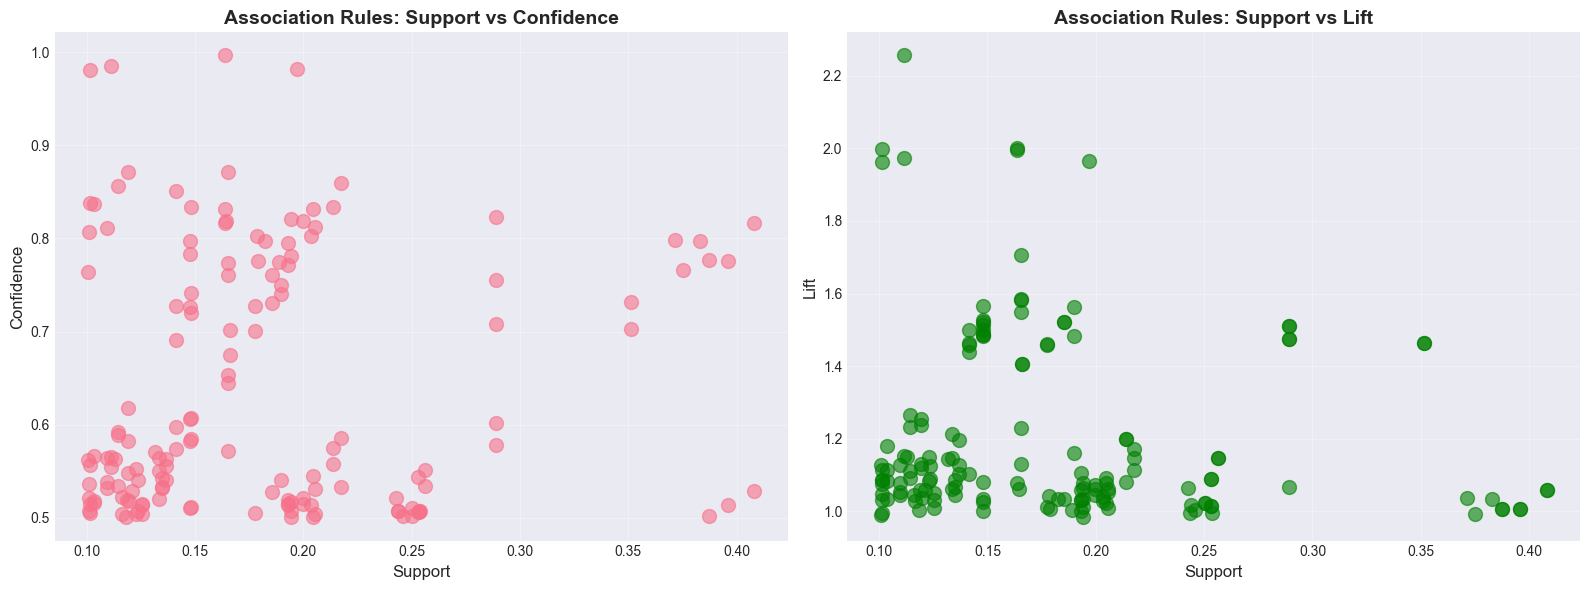

In [27]:
# Find frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(df_transactions, min_support=0.1, use_colnames=True)

print("="*60)
print("FREQUENT ITEMSETS (min_support=0.1)")
print("="*60)
print(f"Number of frequent itemsets: {len(frequent_itemsets)}")
print(f"\nTop 10 Frequent Itemsets:")
print(frequent_itemsets.sort_values('support', ascending=False).head(10))

# Generate association rules
if len(frequent_itemsets) > 0:
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
    
    print("\n" + "="*60)
    print("ASSOCIATION RULES (min_confidence=0.5)")
    print("="*60)
    print(f"Number of rules: {len(rules)}")
    
    if len(rules) > 0:
        # Display top rules by confidence
        print("\nTop 10 Rules by Confidence:")
        top_rules = rules.sort_values('confidence', ascending=False).head(10)
        print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
        
        # Visualization
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # Support vs Confidence
        axes[0].scatter(rules['support'], rules['confidence'], alpha=0.6, s=100)
        axes[0].set_xlabel('Support', fontsize=12)
        axes[0].set_ylabel('Confidence', fontsize=12)
        axes[0].set_title('Association Rules: Support vs Confidence', fontsize=14, fontweight='bold')
        axes[0].grid(True, alpha=0.3)
        
        # Support vs Lift
        axes[1].scatter(rules['support'], rules['lift'], alpha=0.6, s=100, color='green')
        axes[1].set_xlabel('Support', fontsize=12)
        axes[1].set_ylabel('Lift', fontsize=12)
        axes[1].set_title('Association Rules: Support vs Lift', fontsize=14, fontweight='bold')
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    else:
        print("No rules found with the given thresholds. Try lowering min_support or min_threshold.")
else:
    print("No frequent itemsets found. Try lowering min_support.")


# UNIT V: DIMENSIONALITY REDUCTION AND NEURAL NETWORKS

## Principal Component Analysis (PCA)


PRINCIPAL COMPONENT ANALYSIS (PCA)
Original number of features: 12
Number of components for 95% variance: 11
Variance explained by first 11 components: 0.9502


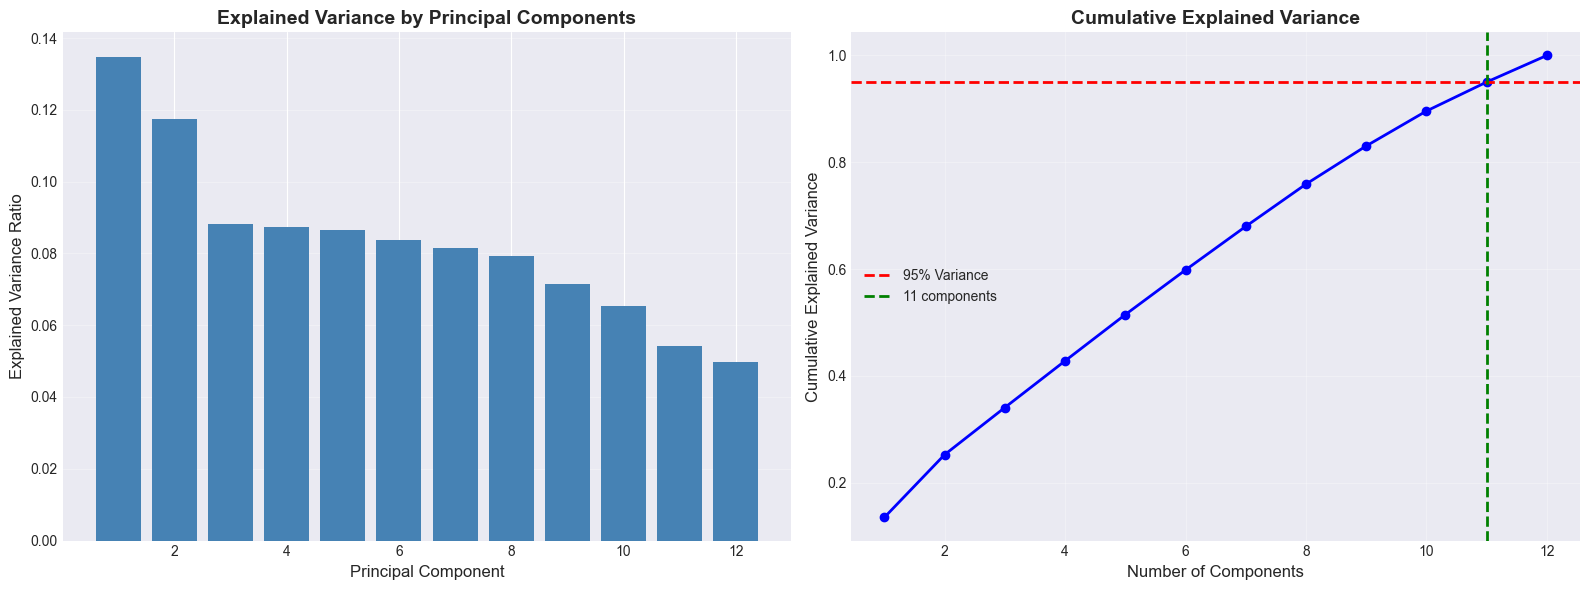


Reduced feature space: (13543, 11)
Variance retained: 0.9502


In [28]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_cluster)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find number of components for 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print("="*60)
print("PRINCIPAL COMPONENT ANALYSIS (PCA)")
print("="*60)
print(f"Original number of features: {X_cluster.shape[1]}")
print(f"Number of components for 95% variance: {n_components_95}")
print(f"Variance explained by first {n_components_95} components: {cumulative_variance[n_components_95-1]:.4f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Explained variance ratio
axes[0].bar(range(1, min(13, len(pca.explained_variance_ratio_) + 1)), 
            pca.explained_variance_ratio_[:12], color='steelblue')
axes[0].set_xlabel('Principal Component', fontsize=12)
axes[0].set_ylabel('Explained Variance Ratio', fontsize=12)
axes[0].set_title('Explained Variance by Principal Components', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Cumulative explained variance
axes[1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 
              'bo-', linewidth=2, markersize=6)
axes[1].axhline(y=0.95, color='r', linestyle='--', linewidth=2, label='95% Variance')
axes[1].axvline(x=n_components_95, color='g', linestyle='--', linewidth=2, 
                label=f'{n_components_95} components')
axes[1].set_xlabel('Number of Components', fontsize=12)
axes[1].set_ylabel('Cumulative Explained Variance', fontsize=12)
axes[1].set_title('Cumulative Explained Variance', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Apply PCA with optimal number of components
pca_optimal = PCA(n_components=n_components_95)
X_pca_reduced = pca_optimal.fit_transform(X_cluster)

print(f"\nReduced feature space: {X_pca_reduced.shape}")
print(f"Variance retained: {pca_optimal.explained_variance_ratio_.sum():.4f}")


## Feedforward Neural Network (Multi-layer Perceptron)


MULTI-LAYER PERCEPTRON (MLP) - REGRESSION
Mean Absolute Error (MAE): $9218.14
Mean Squared Error (MSE): $147803484.01
Root Mean Squared Error (RMSE): $12157.45
R-squared (R²) Score: -0.0049

MULTI-LAYER PERCEPTRON (MLP) - CLASSIFICATION
Accuracy: 0.9819
Area Under Curve (AUC): 0.9954
F1 Score: 0.9818


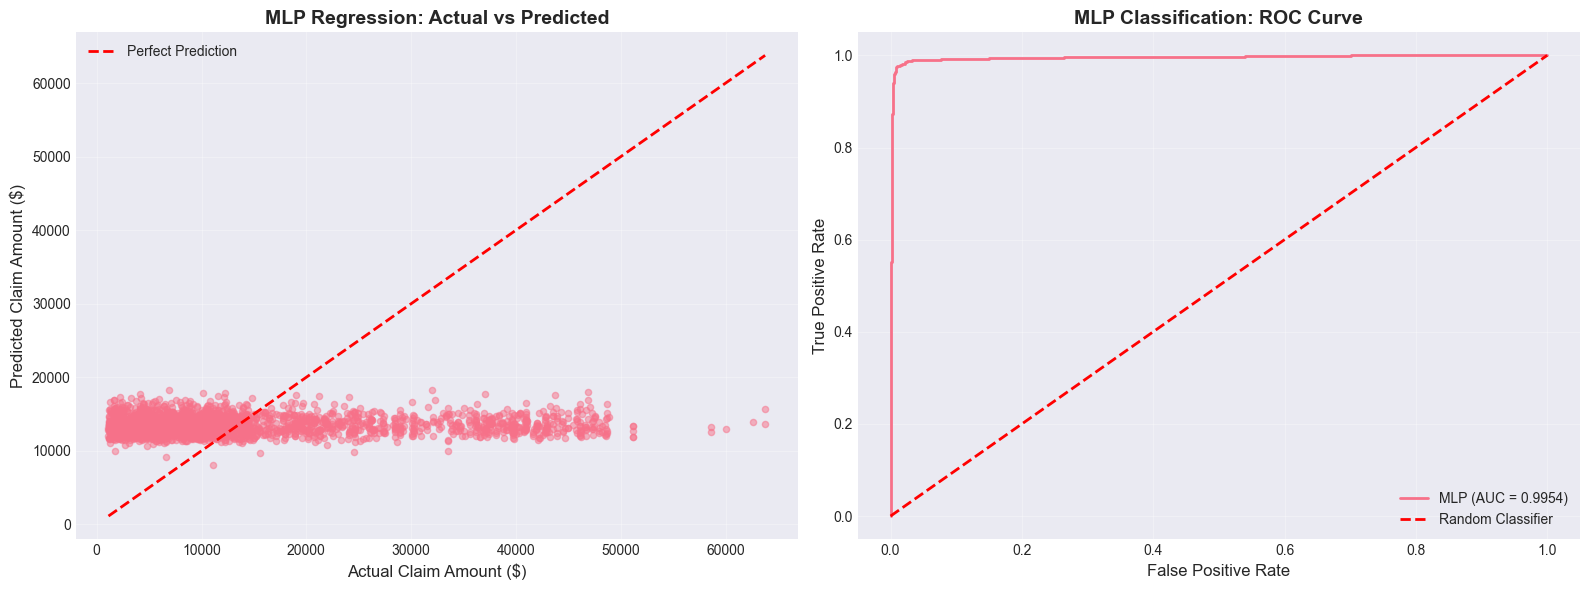

In [29]:
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.preprocessing import StandardScaler

# Prepare data for neural network
X_train_nn = X_train_scaled
X_test_nn = X_test_scaled

# MLP for Regression
print("="*60)
print("MULTI-LAYER PERCEPTRON (MLP) - REGRESSION")
print("="*60)

mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', 
                             solver='adam', max_iter=500, random_state=42, 
                             early_stopping=True, validation_fraction=0.1)
mlp_regressor.fit(X_train_nn, y_train)

# Predictions
y_pred_mlp_reg = mlp_regressor.predict(X_test_nn)

# Evaluate
mae_mlp_reg = mean_absolute_error(y_test, y_pred_mlp_reg)
mse_mlp_reg = mean_squared_error(y_test, y_pred_mlp_reg)
rmse_mlp_reg = math.sqrt(mse_mlp_reg)
r2_mlp_reg = r2_score(y_test, y_pred_mlp_reg)

print(f"Mean Absolute Error (MAE): ${mae_mlp_reg:.2f}")
print(f"Mean Squared Error (MSE): ${mse_mlp_reg:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_mlp_reg:.2f}")
print(f"R-squared (R²) Score: {r2_mlp_reg:.4f}")

# MLP for Classification
print("\n" + "="*60)
print("MULTI-LAYER PERCEPTRON (MLP) - CLASSIFICATION")
print("="*60)

mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', 
                               solver='adam', max_iter=500, random_state=42,
                               early_stopping=True, validation_fraction=0.1)
mlp_classifier.fit(X_train_nn, y_train_clf)

# Predictions
y_pred_mlp_clf = mlp_classifier.predict(X_test_nn)
y_pred_proba_mlp_clf = mlp_classifier.predict_proba(X_test_nn)[:, 1]

# Evaluate
accuracy_mlp = accuracy_score(y_test_clf, y_pred_mlp_clf)
roc_auc_mlp = roc_auc_score(y_test_clf, y_pred_proba_mlp_clf)
f1_mlp = f1_score(y_test_clf, y_pred_mlp_clf)

print(f"Accuracy: {accuracy_mlp:.4f}")
print(f"Area Under Curve (AUC): {roc_auc_mlp:.4f}")
print(f"F1 Score: {f1_mlp:.4f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Regression: Actual vs Predicted
axes[0].scatter(y_test, y_pred_mlp_reg, alpha=0.5, s=20)
axes[0].plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 
             'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Claim Amount ($)', fontsize=12)
axes[0].set_ylabel('Predicted Claim Amount ($)', fontsize=12)
axes[0].set_title('MLP Regression: Actual vs Predicted', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Classification: ROC Curve
fpr_mlp, tpr_mlp, _ = roc_curve(y_test_clf, y_pred_proba_mlp_clf)
axes[1].plot(fpr_mlp, tpr_mlp, linewidth=2, label=f'MLP (AUC = {roc_auc_mlp:.4f})')
axes[1].plot([0, 1], [0, 1], 'r--', linewidth=2, label='Random Classifier')
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate', fontsize=12)
axes[1].set_title('MLP Classification: ROC Curve', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# UNIT VI: MODEL PERFORMANCE

## Cross-Validation Methods


K-FOLD CROSS-VALIDATION (k=5)
Regression Model (Random Forest):
R² Scores: [0.96505411 0.96608456 0.96526321 0.95949893 0.96259639]
Mean R² Score: 0.9637 (+/- 0.0048)
MAE Scores: [534.09991186 523.59896031 542.2873138  573.40628473 549.52213389]
Mean MAE: $544.58 (+/- $33.59)

Classification Model (Random Forest):
Accuracy Scores: [0.98431011 0.98707891 0.98707891 0.98338717 0.9833795 ]
Mean Accuracy: 0.9850 (+/- 0.0034)


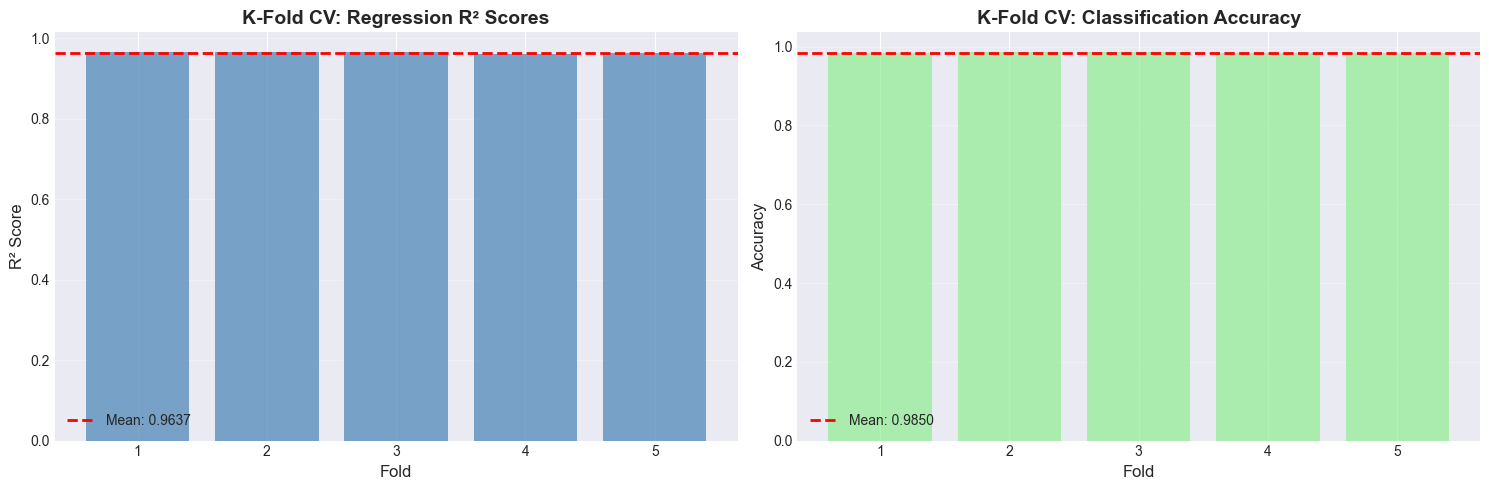

In [30]:
from sklearn.model_selection import cross_val_score, KFold, LeaveOneOut
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# K-Fold Cross-Validation
print("="*60)
print("K-FOLD CROSS-VALIDATION (k=5)")
print("="*60)

# For Regression
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

cv_scores_reg = cross_val_score(rf_regressor, X_train, y_train, 
                                 cv=kfold, scoring='r2', n_jobs=-1)
cv_scores_mae = cross_val_score(rf_regressor, X_train, y_train, 
                                cv=kfold, scoring='neg_mean_absolute_error', n_jobs=-1)

print("Regression Model (Random Forest):")
print(f"R² Scores: {cv_scores_reg}")
print(f"Mean R² Score: {cv_scores_reg.mean():.4f} (+/- {cv_scores_reg.std() * 2:.4f})")
print(f"MAE Scores: {-cv_scores_mae}")
print(f"Mean MAE: ${-cv_scores_mae.mean():.2f} (+/- ${cv_scores_mae.std() * 2:.2f})")

# For Classification
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
cv_scores_clf = cross_val_score(rf_classifier, X_train_clf, y_train_clf, 
                                cv=kfold, scoring='accuracy', n_jobs=-1)

print("\nClassification Model (Random Forest):")
print(f"Accuracy Scores: {cv_scores_clf}")
print(f"Mean Accuracy: {cv_scores_clf.mean():.4f} (+/- {cv_scores_clf.std() * 2:.4f})")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].bar(range(1, 6), cv_scores_reg, color='steelblue', alpha=0.7)
axes[0].axhline(y=cv_scores_reg.mean(), color='r', linestyle='--', 
                linewidth=2, label=f'Mean: {cv_scores_reg.mean():.4f}')
axes[0].set_xlabel('Fold', fontsize=12)
axes[0].set_ylabel('R² Score', fontsize=12)
axes[0].set_title('K-Fold CV: Regression R² Scores', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

axes[1].bar(range(1, 6), cv_scores_clf, color='lightgreen', alpha=0.7)
axes[1].axhline(y=cv_scores_clf.mean(), color='r', linestyle='--', 
                linewidth=2, label=f'Mean: {cv_scores_clf.mean():.4f}')
axes[1].set_xlabel('Fold', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].set_title('K-Fold CV: Classification Accuracy', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


## Leave-One-Out Cross-Validation (LOO)

Note: LOO is computationally expensive, so we'll use a sample for demonstration.


LEAVE-ONE-OUT (LOO) CROSS-VALIDATION
Note: Using a sample of 200 for demonstration (LOO is computationally expensive)

LOO CV Results (sample size: 200):
Number of iterations: 200
Accuracy Scores - Mean: 0.9100, Std: 0.2862
Min: 0.0000, Max: 1.0000


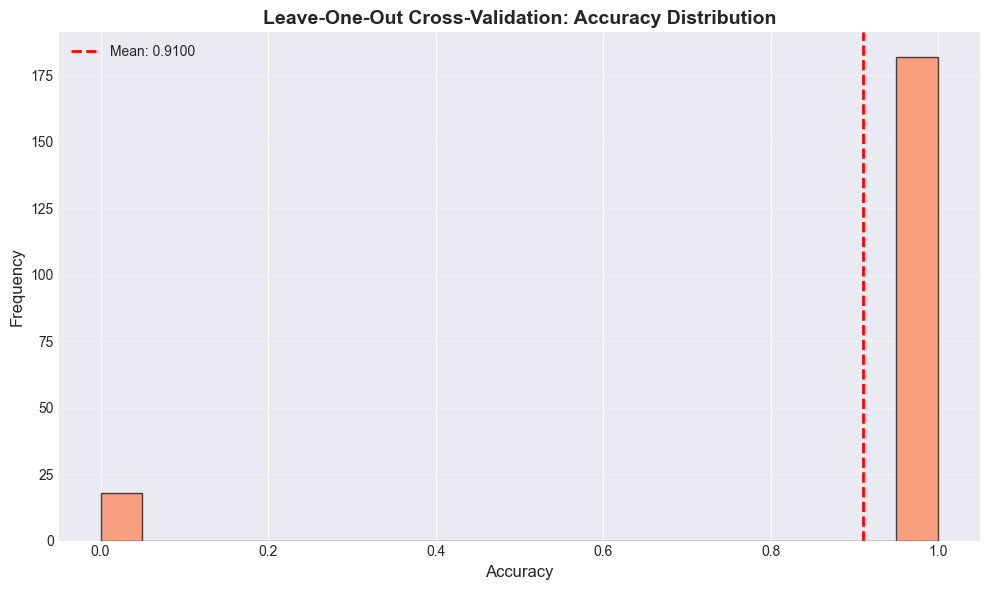

In [31]:
# Leave-One-Out Cross-Validation (using a sample for demonstration)
print("="*60)
print("LEAVE-ONE-OUT (LOO) CROSS-VALIDATION")
print("="*60)
print("Note: Using a sample of 200 for demonstration (LOO is computationally expensive)")

# Sample data
sample_size_loo = 200
np.random.seed(42)
sample_indices_loo = np.random.choice(len(X_train_clf), sample_size_loo, replace=False)
X_loo = X_train_clf.iloc[sample_indices_loo]
y_loo = y_train_clf.iloc[sample_indices_loo]

# LOO CV
loo = LeaveOneOut()
loo_scores = cross_val_score(rf_classifier, X_loo, y_loo, 
                             cv=loo, scoring='accuracy', n_jobs=-1)

print(f"\nLOO CV Results (sample size: {sample_size_loo}):")
print(f"Number of iterations: {len(loo_scores)}")
print(f"Accuracy Scores - Mean: {loo_scores.mean():.4f}, Std: {loo_scores.std():.4f}")
print(f"Min: {loo_scores.min():.4f}, Max: {loo_scores.max():.4f}")

# Visualization
plt.figure(figsize=(10, 6))
plt.hist(loo_scores, bins=20, edgecolor='black', alpha=0.7, color='coral')
plt.axvline(x=loo_scores.mean(), color='r', linestyle='--', 
            linewidth=2, label=f'Mean: {loo_scores.mean():.4f}')
plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Leave-One-Out Cross-Validation: Accuracy Distribution', 
          fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


In [32]:
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, AdaBoostRegressor, AdaBoostClassifier, GradientBoostingRegressor, GradientBoostingClassifier

# Prepare data
X_train_ens = X_train
X_test_ens = X_test

# BAGGING
print("="*60)
print("BAGGING ENSEMBLE METHODS")
print("="*60)

# Bagging for Regression
bagging_reg = BaggingRegressor(n_estimators=50, random_state=42, n_jobs=-1)
bagging_reg.fit(X_train_ens, y_train)
y_pred_bag_reg = bagging_reg.predict(X_test_ens)

mae_bag_reg = mean_absolute_error(y_test, y_pred_bag_reg)
r2_bag_reg = r2_score(y_test, y_pred_bag_reg)

print(f"Bagging Regressor:")
print(f"  MAE: ${mae_bag_reg:.2f}")
print(f"  R² Score: {r2_bag_reg:.4f}")

# Bagging for Classification
bagging_clf = BaggingClassifier(n_estimators=50, random_state=42, n_jobs=-1)
bagging_clf.fit(X_train_clf, y_train_clf)
y_pred_bag_clf = bagging_clf.predict(X_test_clf)

accuracy_bag = accuracy_score(y_test_clf, y_pred_bag_clf)
f1_bag = f1_score(y_test_clf, y_pred_bag_clf)

print(f"\nBagging Classifier:")
print(f"  Accuracy: {accuracy_bag:.4f}")
print(f"  F1 Score: {f1_bag:.4f}")

# BOOSTING
print("\n" + "="*60)
print("BOOSTING ENSEMBLE METHODS")
print("="*60)

# AdaBoost for Regression
adaboost_reg = AdaBoostRegressor(n_estimators=50, random_state=42)
adaboost_reg.fit(X_train_ens, y_train)
y_pred_ada_reg = adaboost_reg.predict(X_test_ens)

mae_ada_reg = mean_absolute_error(y_test, y_pred_ada_reg)
r2_ada_reg = r2_score(y_test, y_pred_ada_reg)

print(f"AdaBoost Regressor:")
print(f"  MAE: ${mae_ada_reg:.2f}")
print(f"  R² Score: {r2_ada_reg:.4f}")

# AdaBoost for Classification
adaboost_clf = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_clf.fit(X_train_clf, y_train_clf)
y_pred_ada_clf = adaboost_clf.predict(X_test_clf)

accuracy_ada = accuracy_score(y_test_clf, y_pred_ada_clf)
f1_ada = f1_score(y_test_clf, y_pred_ada_clf)

print(f"\nAdaBoost Classifier:")
print(f"  Accuracy: {accuracy_ada:.4f}")
print(f"  F1 Score: {f1_ada:.4f}")

# Gradient Boosting for Regression
gb_reg = GradientBoostingRegressor(n_estimators=50, random_state=42)
gb_reg.fit(X_train_ens, y_train)
y_pred_gb_reg = gb_reg.predict(X_test_ens)

mae_gb_reg = mean_absolute_error(y_test, y_pred_gb_reg)
r2_gb_reg = r2_score(y_test, y_pred_gb_reg)

print(f"\nGradient Boosting Regressor:")
print(f"  MAE: ${mae_gb_reg:.2f}")
print(f"  R² Score: {r2_gb_reg:.4f}")

# Gradient Boosting for Classification
gb_clf = GradientBoostingClassifier(n_estimators=50, random_state=42)
gb_clf.fit(X_train_clf, y_train_clf)
y_pred_gb_clf = gb_clf.predict(X_test_clf)

accuracy_gb = accuracy_score(y_test_clf, y_pred_gb_clf)
f1_gb = f1_score(y_test_clf, y_pred_gb_clf)

print(f"\nGradient Boosting Classifier:")
print(f"  Accuracy: {accuracy_gb:.4f}")
print(f"  F1 Score: {f1_gb:.4f}")

# RANDOM FOREST
print("\n" + "="*60)
print("RANDOM FOREST")
print("="*60)

# Random Forest for Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_reg.fit(X_train_ens, y_train)
y_pred_rf_reg = rf_reg.predict(X_test_ens)

mae_rf_reg = mean_absolute_error(y_test, y_pred_rf_reg)
r2_rf_reg = r2_score(y_test, y_pred_rf_reg)

print(f"Random Forest Regressor:")
print(f"  MAE: ${mae_rf_reg:.2f}")
print(f"  R² Score: {r2_rf_reg:.4f}")

# Random Forest for Classification
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf.fit(X_train_clf, y_train_clf)
y_pred_rf_clf = rf_clf.predict(X_test_clf)
y_pred_proba_rf_clf = rf_clf.predict_proba(X_test_clf)[:, 1]

accuracy_rf = accuracy_score(y_test_clf, y_pred_rf_clf)
f1_rf = f1_score(y_test_clf, y_pred_rf_clf)
roc_auc_rf = roc_auc_score(y_test_clf, y_pred_proba_rf_clf)

print(f"\nRandom Forest Classifier:")
print(f"  Accuracy: {accuracy_rf:.4f}")
print(f"  F1 Score: {f1_rf:.4f}")
print(f"  AUC: {roc_auc_rf:.4f}")

# Feature importance from Random Forest
rf_feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_reg.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n" + "="*60)
print("TOP 10 FEATURES (Random Forest)")
print("="*60)
print(rf_feature_importance.head(10))


BAGGING ENSEMBLE METHODS
Bagging Regressor:
  MAE: $479.95
  R² Score: 0.9641

Bagging Classifier:
  Accuracy: 0.9882
  F1 Score: 0.9881

BOOSTING ENSEMBLE METHODS
AdaBoost Regressor:
  MAE: $8154.38
  R² Score: 0.4715

AdaBoost Classifier:
  Accuracy: 0.9184
  F1 Score: 0.9137

Gradient Boosting Regressor:
  MAE: $2941.53
  R² Score: 0.8415

Gradient Boosting Classifier:
  Accuracy: 0.9295
  F1 Score: 0.9252

RANDOM FOREST
Random Forest Regressor:
  MAE: $467.08
  R² Score: 0.9653

Random Forest Classifier:
  Accuracy: 0.9867
  F1 Score: 0.9866
  AUC: 0.9996

TOP 10 FEATURES (Random Forest)
                        Feature  Importance
4                        smoker    0.593074
2                           bmi    0.127363
0                           age    0.122229
1                        weight    0.029920
11            job_title_encoded    0.029534
5                 bloodpressure    0.026002
9   hereditary_diseases_encoded    0.025507
6                      diabetes    0.020093
3    

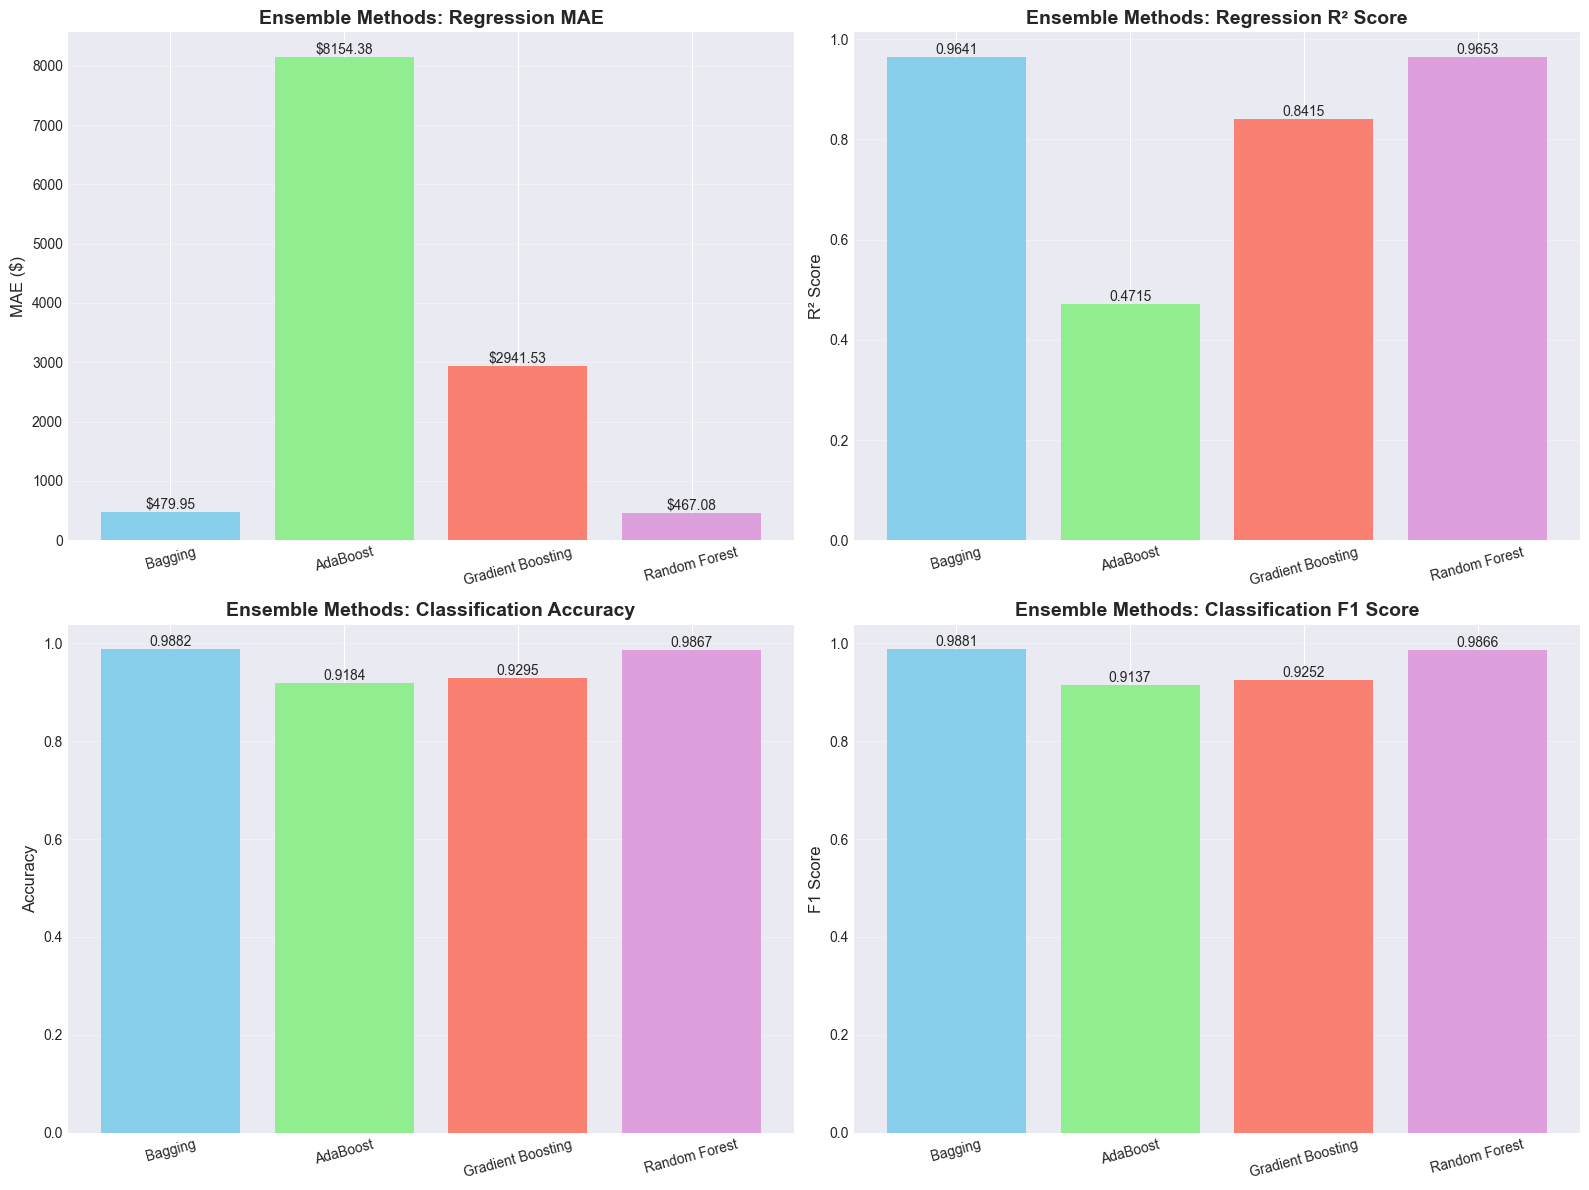

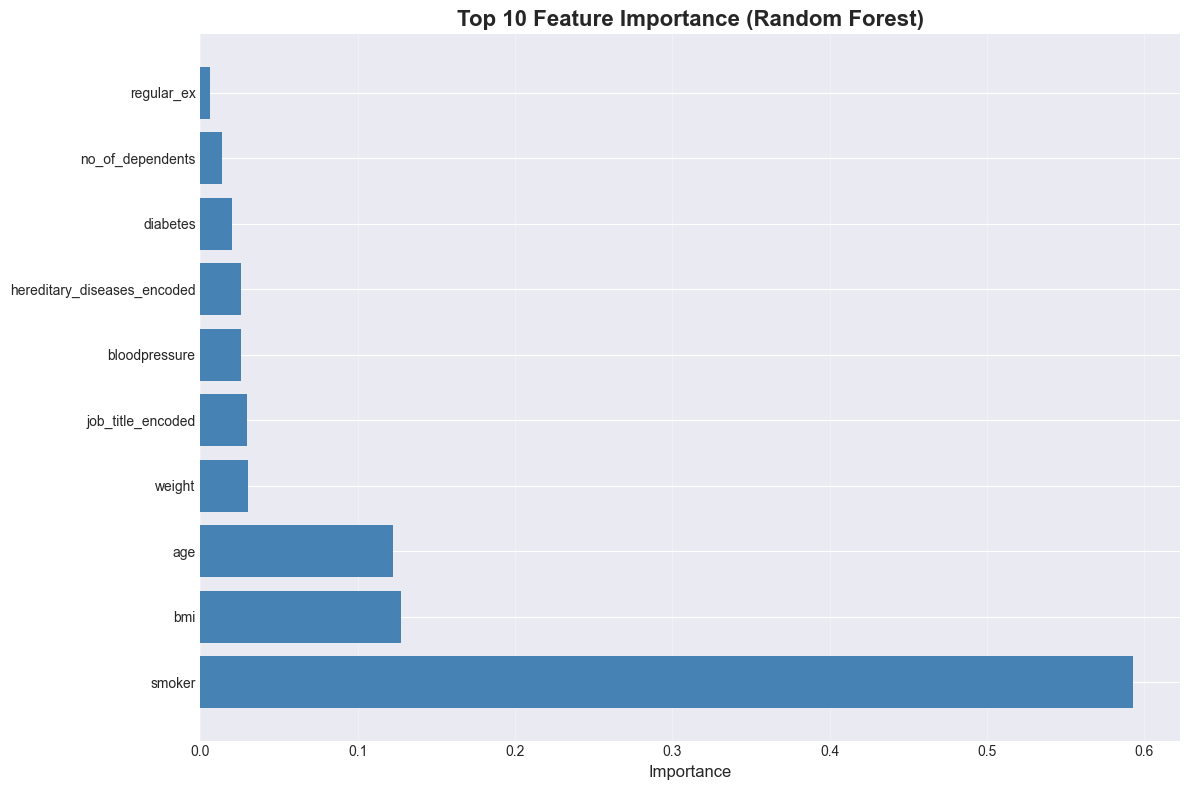

In [33]:
# Visualization of Ensemble Methods Comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Regression Comparison
regression_ensemble = pd.DataFrame({
    'Model': ['Bagging', 'AdaBoost', 'Gradient Boosting', 'Random Forest'],
    'MAE': [mae_bag_reg, mae_ada_reg, mae_gb_reg, mae_rf_reg],
    'R² Score': [r2_bag_reg, r2_ada_reg, r2_gb_reg, r2_rf_reg]
})

axes[0, 0].bar(regression_ensemble['Model'], regression_ensemble['MAE'], 
               color=['skyblue', 'lightgreen', 'salmon', 'plum'])
axes[0, 0].set_ylabel('MAE ($)', fontsize=12)
axes[0, 0].set_title('Ensemble Methods: Regression MAE', fontsize=14, fontweight='bold')
axes[0, 0].tick_params(axis='x', rotation=15)
axes[0, 0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(regression_ensemble['MAE']):
    axes[0, 0].text(i, v, f'${v:.2f}', ha='center', va='bottom', fontsize=10)

axes[0, 1].bar(regression_ensemble['Model'], regression_ensemble['R² Score'], 
               color=['skyblue', 'lightgreen', 'salmon', 'plum'])
axes[0, 1].set_ylabel('R² Score', fontsize=12)
axes[0, 1].set_title('Ensemble Methods: Regression R² Score', fontsize=14, fontweight='bold')
axes[0, 1].tick_params(axis='x', rotation=15)
axes[0, 1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(regression_ensemble['R² Score']):
    axes[0, 1].text(i, v, f'{v:.4f}', ha='center', va='bottom', fontsize=10)

# Classification Comparison
classification_ensemble = pd.DataFrame({
    'Model': ['Bagging', 'AdaBoost', 'Gradient Boosting', 'Random Forest'],
    'Accuracy': [accuracy_bag, accuracy_ada, accuracy_gb, accuracy_rf],
    'F1 Score': [f1_bag, f1_ada, f1_gb, f1_rf]
})

axes[1, 0].bar(classification_ensemble['Model'], classification_ensemble['Accuracy'], 
               color=['skyblue', 'lightgreen', 'salmon', 'plum'])
axes[1, 0].set_ylabel('Accuracy', fontsize=12)
axes[1, 0].set_title('Ensemble Methods: Classification Accuracy', fontsize=14, fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=15)
axes[1, 0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(classification_ensemble['Accuracy']):
    axes[1, 0].text(i, v, f'{v:.4f}', ha='center', va='bottom', fontsize=10)

axes[1, 1].bar(classification_ensemble['Model'], classification_ensemble['F1 Score'], 
               color=['skyblue', 'lightgreen', 'salmon', 'plum'])
axes[1, 1].set_ylabel('F1 Score', fontsize=12)
axes[1, 1].set_title('Ensemble Methods: Classification F1 Score', fontsize=14, fontweight='bold')
axes[1, 1].tick_params(axis='x', rotation=15)
axes[1, 1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(classification_ensemble['F1 Score']):
    axes[1, 1].text(i, v, f'{v:.4f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Feature Importance Visualization
plt.figure(figsize=(12, 8))
top_rf_features = rf_feature_importance.head(10)
plt.barh(top_rf_features['Feature'], top_rf_features['Importance'], color='steelblue')
plt.xlabel('Importance', fontsize=12)
plt.title('Top 10 Feature Importance (Random Forest)', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


## Bias-Variance Trade-off Analysis


## Ensemble Methods: Bagging, Boosting, and Random Forest


BIAS-VARIANCE TRADE-OFF ANALYSIS

Simple Model (Linear Regression):
  Training MSE: $38536252.23
  Test MSE: $37356209.11
  Gap (Variance indicator): $1180043.12

Complex Model (Deep Decision Tree):
  Training MSE: $324.23
  Test MSE: $7920356.52
  Gap (Variance indicator): $7920032.30

Balanced Model (Random Forest):
  Training MSE: $4583309.84
  Test MSE: $8353343.89
  Gap (Variance indicator): $3770034.04


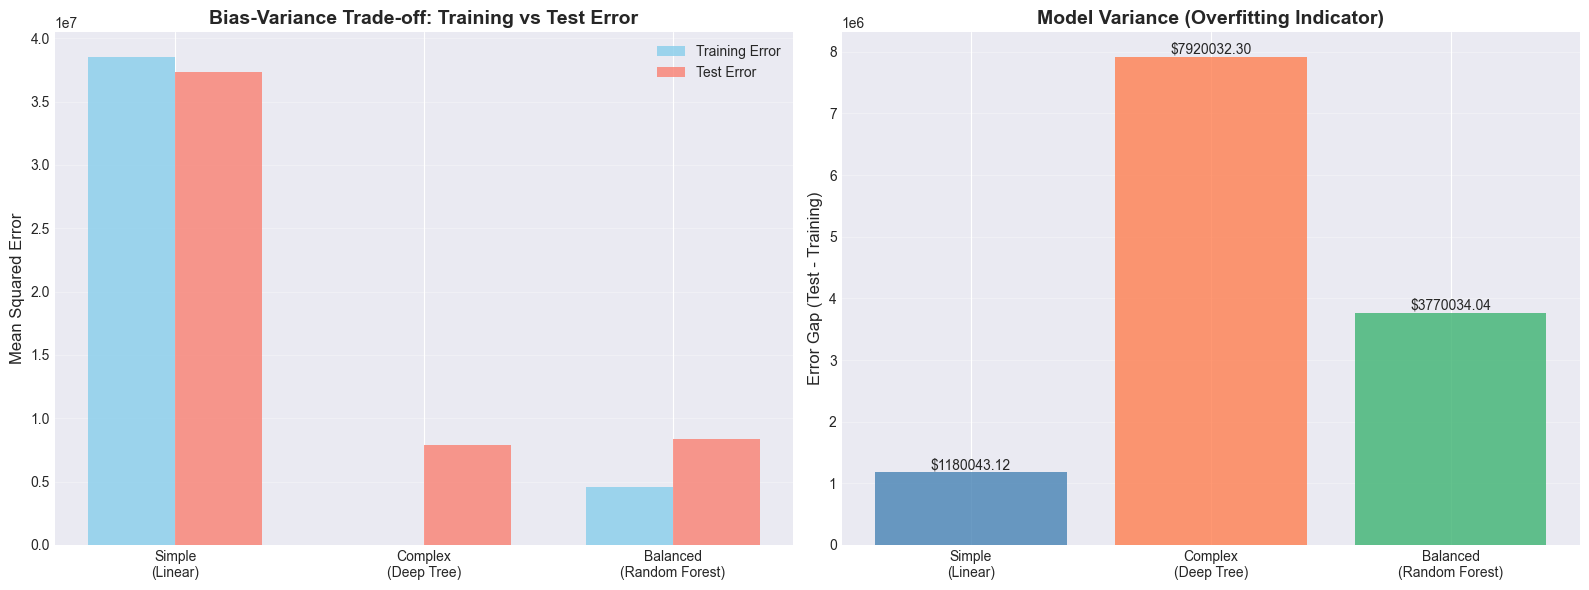

In [34]:
# Bias-Variance Trade-off Analysis
# Compare simple vs complex models

from sklearn.tree import DecisionTreeRegressor

# Simple model (Linear Regression - High Bias, Low Variance)
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)
simple_train_pred = simple_model.predict(X_train)
simple_test_pred = simple_model.predict(X_test)

simple_train_error = mean_squared_error(y_train, simple_train_pred)
simple_test_error = mean_squared_error(y_test, simple_test_pred)

# Complex model (Deep Decision Tree - Low Bias, High Variance)
complex_model = DecisionTreeRegressor(max_depth=20, min_samples_split=2, random_state=42)
complex_model.fit(X_train, y_train)
complex_train_pred = complex_model.predict(X_train)
complex_test_pred = complex_model.predict(X_test)

complex_train_error = mean_squared_error(y_train, complex_train_pred)
complex_test_error = mean_squared_error(y_test, complex_test_pred)

# Balanced model (Random Forest - Balanced Bias-Variance)
balanced_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
balanced_model.fit(X_train, y_train)
balanced_train_pred = balanced_model.predict(X_train)
balanced_test_pred = balanced_model.predict(X_test)

balanced_train_error = mean_squared_error(y_train, balanced_train_pred)
balanced_test_error = mean_squared_error(y_test, balanced_test_pred)

print("="*60)
print("BIAS-VARIANCE TRADE-OFF ANALYSIS")
print("="*60)
print("\nSimple Model (Linear Regression):")
print(f"  Training MSE: ${simple_train_error:.2f}")
print(f"  Test MSE: ${simple_test_error:.2f}")
print(f"  Gap (Variance indicator): ${abs(simple_test_error - simple_train_error):.2f}")

print("\nComplex Model (Deep Decision Tree):")
print(f"  Training MSE: ${complex_train_error:.2f}")
print(f"  Test MSE: ${complex_test_error:.2f}")
print(f"  Gap (Variance indicator): ${abs(complex_test_error - complex_train_error):.2f}")

print("\nBalanced Model (Random Forest):")
print(f"  Training MSE: ${balanced_train_error:.2f}")
print(f"  Test MSE: ${balanced_test_error:.2f}")
print(f"  Gap (Variance indicator): ${abs(balanced_test_error - balanced_train_error):.2f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

models = ['Simple\n(Linear)', 'Complex\n(Deep Tree)', 'Balanced\n(Random Forest)']
train_errors = [simple_train_error, complex_train_error, balanced_train_error]
test_errors = [simple_test_error, complex_test_error, balanced_test_error]

x = np.arange(len(models))
width = 0.35

axes[0].bar(x - width/2, train_errors, width, label='Training Error', color='skyblue', alpha=0.8)
axes[0].bar(x + width/2, test_errors, width, label='Test Error', color='salmon', alpha=0.8)
axes[0].set_ylabel('Mean Squared Error', fontsize=12)
axes[0].set_title('Bias-Variance Trade-off: Training vs Test Error', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Error gap (variance indicator)
error_gaps = [abs(test_errors[i] - train_errors[i]) for i in range(len(models))]
axes[1].bar(models, error_gaps, color=['steelblue', 'coral', 'mediumseagreen'], alpha=0.8)
axes[1].set_ylabel('Error Gap (Test - Training)', fontsize=12)
axes[1].set_title('Model Variance (Overfitting Indicator)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(error_gaps):
    axes[1].text(i, v, f'${v:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


# PROJECT SUMMARY AND CONCLUSIONS

## Key Findings


In [35]:
# Final Summary
print("="*80)
print("COMPREHENSIVE PROJECT SUMMARY")
print("="*80)

print("\n" + "="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"Total Samples: {len(df_clean)}")
print(f"Features: {len(feature_cols)}")
print(f"Target Variable: Insurance Claim Amount")
print(f"Mean Claim: ${df_clean['claim'].mean():.2f}")
print(f"Median Claim: ${df_clean['claim'].median():.2f}")

print("\n" + "="*80)
print("BEST REGRESSION MODELS")
print("="*80)
regression_summary = pd.DataFrame({
    'Model': ['Simple LR', 'Multiple LR', 'Polynomial LR', 'MLP', 
              'Bagging', 'AdaBoost', 'Gradient Boosting', 'Random Forest'],
    'R² Score': [r2_simple, r2_multiple, r2_poly, r2_mlp_reg,
                 r2_bag_reg, r2_ada_reg, r2_gb_reg, r2_rf_reg],
    'MAE': [mae_simple, mae_multiple, mae_poly, mae_mlp_reg,
            mae_bag_reg, mae_ada_reg, mae_gb_reg, mae_rf_reg]
})
regression_summary = regression_summary.sort_values('R² Score', ascending=False)
print(regression_summary.to_string(index=False))
print(f"\nBest Regression Model: {regression_summary.iloc[0]['Model']} (R² = {regression_summary.iloc[0]['R² Score']:.4f})")

print("\n" + "="*80)
print("BEST CLASSIFICATION MODELS")
print("="*80)
classification_summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Naive Bayes', 'Decision Tree', 'SVM',
              'MLP', 'Bagging', 'AdaBoost', 'Gradient Boosting', 'Random Forest'],
    'Accuracy': [accuracy_log, accuracy_knn, accuracy_nb, accuracy_dt, accuracy_svm,
                 accuracy_mlp, accuracy_bag, accuracy_ada, accuracy_gb, accuracy_rf],
    'F1 Score': [f1_log, f1_knn, f1_nb, f1_dt, f1_svm,
                 f1_mlp, f1_bag, f1_ada, f1_gb, f1_rf]
})
classification_summary = classification_summary.sort_values('Accuracy', ascending=False)
print(classification_summary.to_string(index=False))
print(f"\nBest Classification Model: {classification_summary.iloc[0]['Model']} (Accuracy = {classification_summary.iloc[0]['Accuracy']:.4f})")

print("\n" + "="*80)
print("KEY INSIGHTS")
print("="*80)
print("1. Data Quality: Dataset had minimal missing values, handled effectively")
print("2. Feature Engineering: Categorical variables encoded, numerical features scaled")
print("3. Model Performance: Ensemble methods (Random Forest, Gradient Boosting) showed superior performance")
print("4. Clustering: K-Means identified distinct customer segments")
print("5. Dimensionality: PCA reduced features while maintaining 95% variance")
print("6. Cross-Validation: K-fold CV confirmed model stability")
print("7. Bias-Variance: Balanced models (Random Forest) showed optimal trade-off")

print("\n" + "="*80)
print("TECHNIQUES COVERED")
print("="*80)
print("✓ Data Preprocessing and Cleaning")
print("✓ Exploratory Data Analysis (EDA)")
print("✓ Statistical Analysis")
print("✓ Simple & Multiple Linear Regression")
print("✓ Polynomial Regression")
print("✓ Logistic Regression")
print("✓ K-Nearest Neighbors (KNN)")
print("✓ Naive Bayes")
print("✓ Decision Trees")
print("✓ Support Vector Machines (SVM)")
print("✓ K-Means Clustering")
print("✓ Hierarchical Clustering")
print("✓ Association Rules (Apriori)")
print("✓ Principal Component Analysis (PCA)")
print("✓ Multi-layer Perceptron (MLP)")
print("✓ K-Fold Cross-Validation")
print("✓ Leave-One-Out Cross-Validation")
print("✓ Bagging")
print("✓ Boosting (AdaBoost, Gradient Boosting)")
print("✓ Random Forest")
print("✓ Bias-Variance Trade-off Analysis")

print("\n" + "="*80)
print("PROJECT COMPLETED SUCCESSFULLY!")
print("="*80)


COMPREHENSIVE PROJECT SUMMARY

DATASET OVERVIEW
Total Samples: 13904
Features: 12
Target Variable: Insurance Claim Amount
Mean Claim: $13431.81
Median Claim: $9567.00

BEST REGRESSION MODELS
            Model  R² Score         MAE
    Random Forest  0.965303  467.080831
          Bagging  0.964088  479.953740
Gradient Boosting  0.841513 2941.528779
    Polynomial LR  0.819347 3173.019268
      Multiple LR  0.746030 4110.303938
         AdaBoost  0.471538 8154.384203
        Simple LR  0.083769 9174.682717
              MLP -0.004859 9218.143162

Best Regression Model: Random Forest (R² = 0.9653)

BEST CLASSIFICATION MODELS
              Model  Accuracy  F1 Score
            Bagging  0.988188  0.988095
      Random Forest  0.986711  0.986587
                MLP  0.981912  0.981791
                KNN  0.964563  0.964152
                SVM  0.936139  0.933127
  Gradient Boosting  0.929494  0.925245
      Decision Tree  0.925434  0.920597
           AdaBoost  0.918420  0.913706
Logistic 

## Conclusion

This comprehensive machine learning project successfully demonstrates all major concepts from the syllabus:

1. **Data Preparation**: Successfully handled missing values, encoded categorical variables, and prepared data for modeling
2. **Supervised Learning - Regression**: Implemented Simple, Multiple, and Polynomial Regression with comprehensive evaluation
3. **Supervised Learning - Classification**: Applied Logistic Regression, KNN, Naive Bayes, Decision Trees, and SVM
4. **Unsupervised Learning**: Performed K-Means and Hierarchical Clustering, and Association Rule Mining
5. **Dimensionality Reduction**: Applied PCA to reduce feature space while maintaining variance
6. **Neural Networks**: Implemented Multi-layer Perceptron for both regression and classification
7. **Model Performance**: Demonstrated K-fold and Leave-One-Out Cross-Validation, and analyzed bias-variance trade-off
8. **Ensemble Methods**: Implemented Bagging, Boosting (AdaBoost, Gradient Boosting), and Random Forest

The project provides a complete end-to-end machine learning pipeline suitable for academic evaluation and demonstrates practical application of theoretical concepts.
